<a href="https://colab.research.google.com/github/irenebetsy/Lung-Cancer-Prediction/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [259]:
dataset=pd.read_csv("/content/drive/MyDrive/survey_lung_cancer.csv")
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [260]:
print(dataset.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


                            AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.001270  0.030718        0.345904  0.489403   
CHEST 

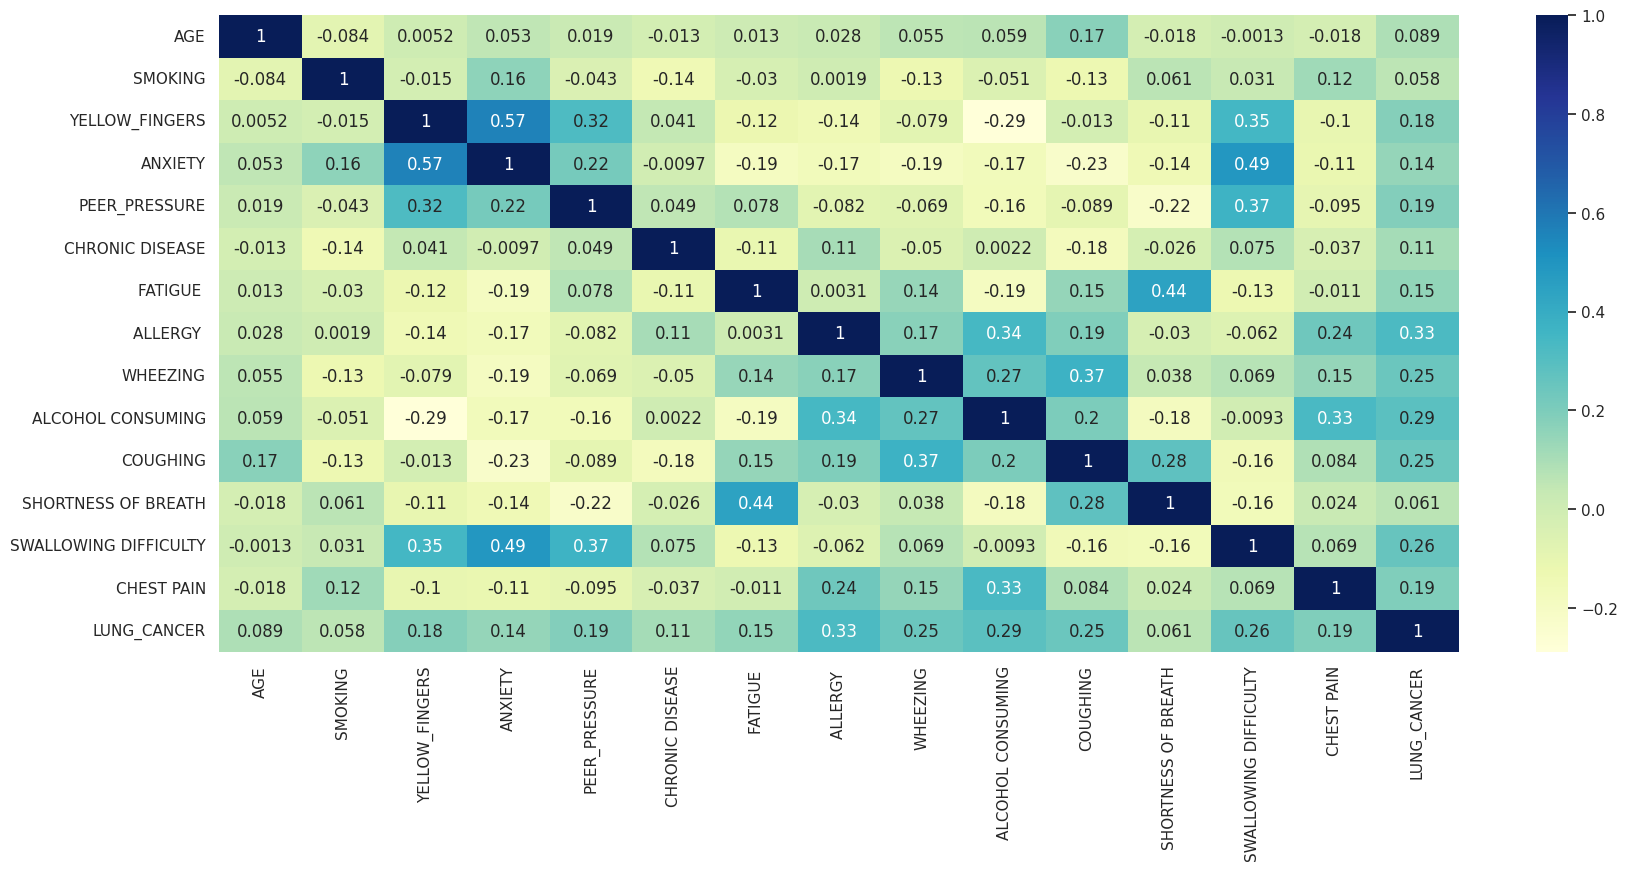

In [261]:
import matplotlib.pyplot as mp
import seaborn as sb
numeric_dataset = dataset.select_dtypes(include=['number'])
print(numeric_dataset.corr())
dataplot = sb.heatmap(numeric_dataset.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [262]:
dataset['GENDER']

,GENDER
0,M
1,M
2,F
3,M
4,F
...,...
304,F
305,M
306,M
307,M


In [263]:
# Encoding the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['GENDER']= label_encoder.fit_transform(dataset.GENDER)

In [264]:
pd.DataFrame(dataset['GENDER'])

,GENDER
0,1
1,1
2,0
3,1
4,0
...,...
304,0
305,1
306,1
307,1


In [265]:
data=dataset

In [266]:
data=pd.get_dummies(dataset)
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [267]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [268]:
x=data.drop('LUNG_CANCER',axis=1)


In [269]:
y=data.iloc[:,-1]
y

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [271]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [272]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [273]:
data.dtypes

,0
GENDER,int64
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [274]:
data['GENDER'].value_counts()

,count
GENDER,
1,162
0,147


In [275]:
data['SMOKING'].value_counts()

,count
SMOKING,
1,174
0,135


In [276]:
data['YELLOW_FINGERS'].value_counts()

,count
YELLOW_FINGERS,
1,176
0,133


In [277]:
data['ANXIETY'].value_counts()

,count
ANXIETY,
0,155
1,154


In [278]:
data['PEER_PRESSURE'].value_counts()

,count
PEER_PRESSURE,
1,155
0,154


In [279]:
data['CHRONIC DISEASE'].value_counts()

,count
CHRONIC DISEASE,
1,156
0,153


In [280]:
data['FATIGUE '].value_counts()

,count
FATIGUE,
1,208
0,101


In [281]:
data['ALLERGY '].value_counts()

,count
ALLERGY,
1,172
0,137


In [282]:
data['WHEEZING'].value_counts()

,count
WHEEZING,
1,172
0,137


In [283]:
data['ALCOHOL CONSUMING'].value_counts()

,count
ALCOHOL CONSUMING,
1,172
0,137


In [284]:
data['COUGHING'].value_counts()

,count
COUGHING,
1,179
0,130


In [285]:
data['SHORTNESS OF BREATH'].value_counts()

,count
SHORTNESS OF BREATH,
1,198
0,111


In [286]:
data['SWALLOWING DIFFICULTY'].value_counts()

,count
SWALLOWING DIFFICULTY,
0,164
1,145


In [287]:
data['CHEST PAIN'].value_counts()

,count
CHEST PAIN,
1,172
0,137


In [288]:
numerical=['AGE']
categorical=['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




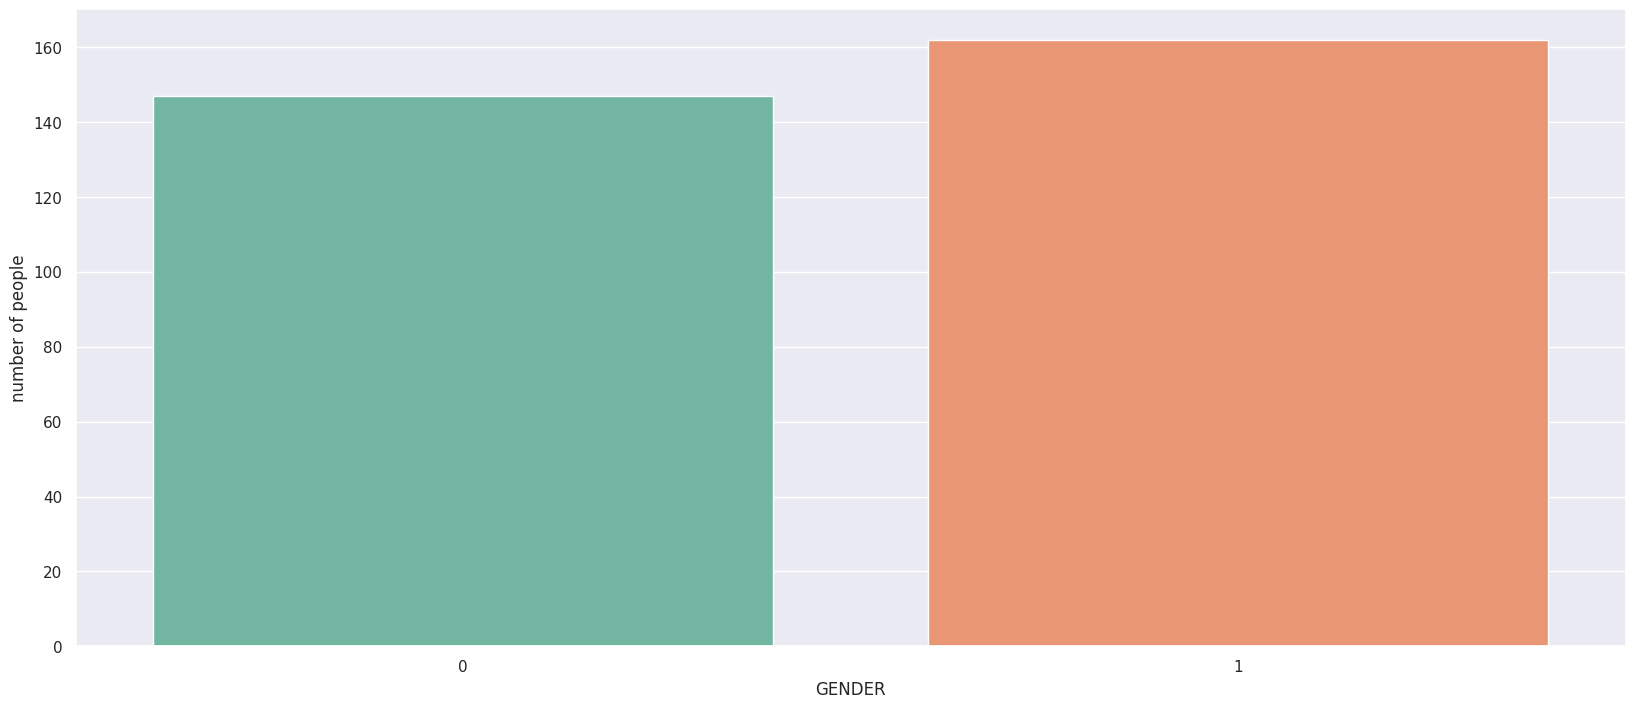

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




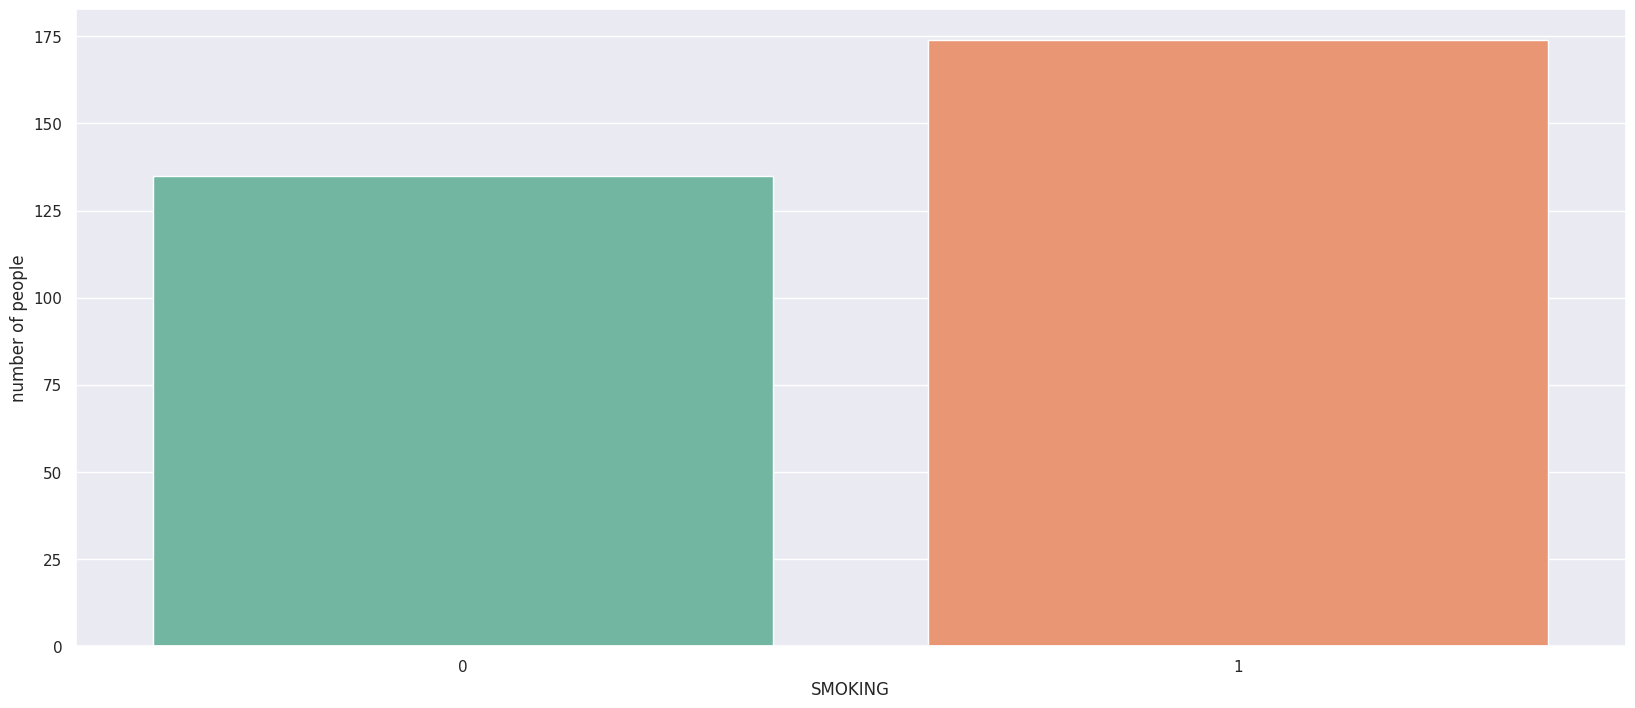

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




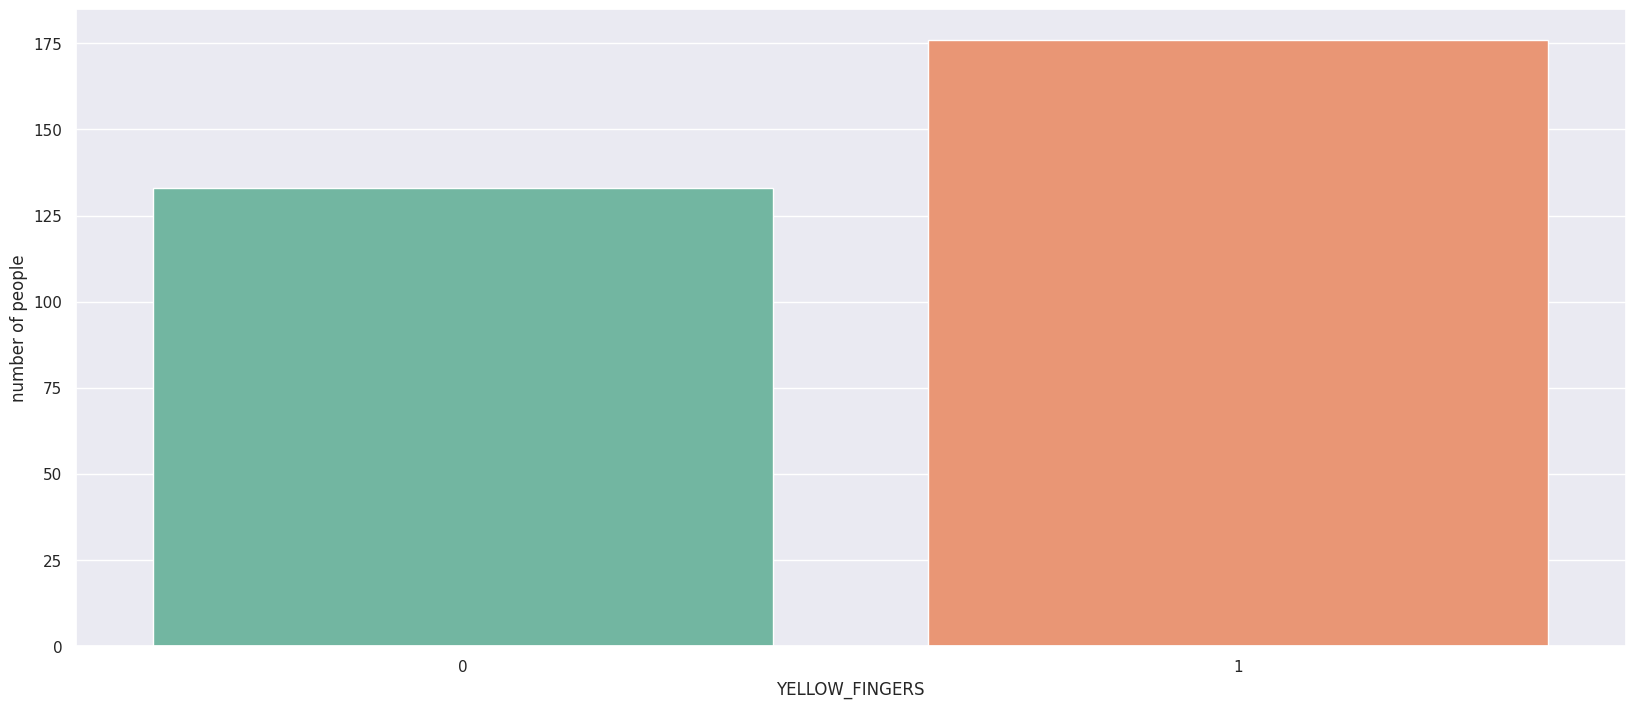

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




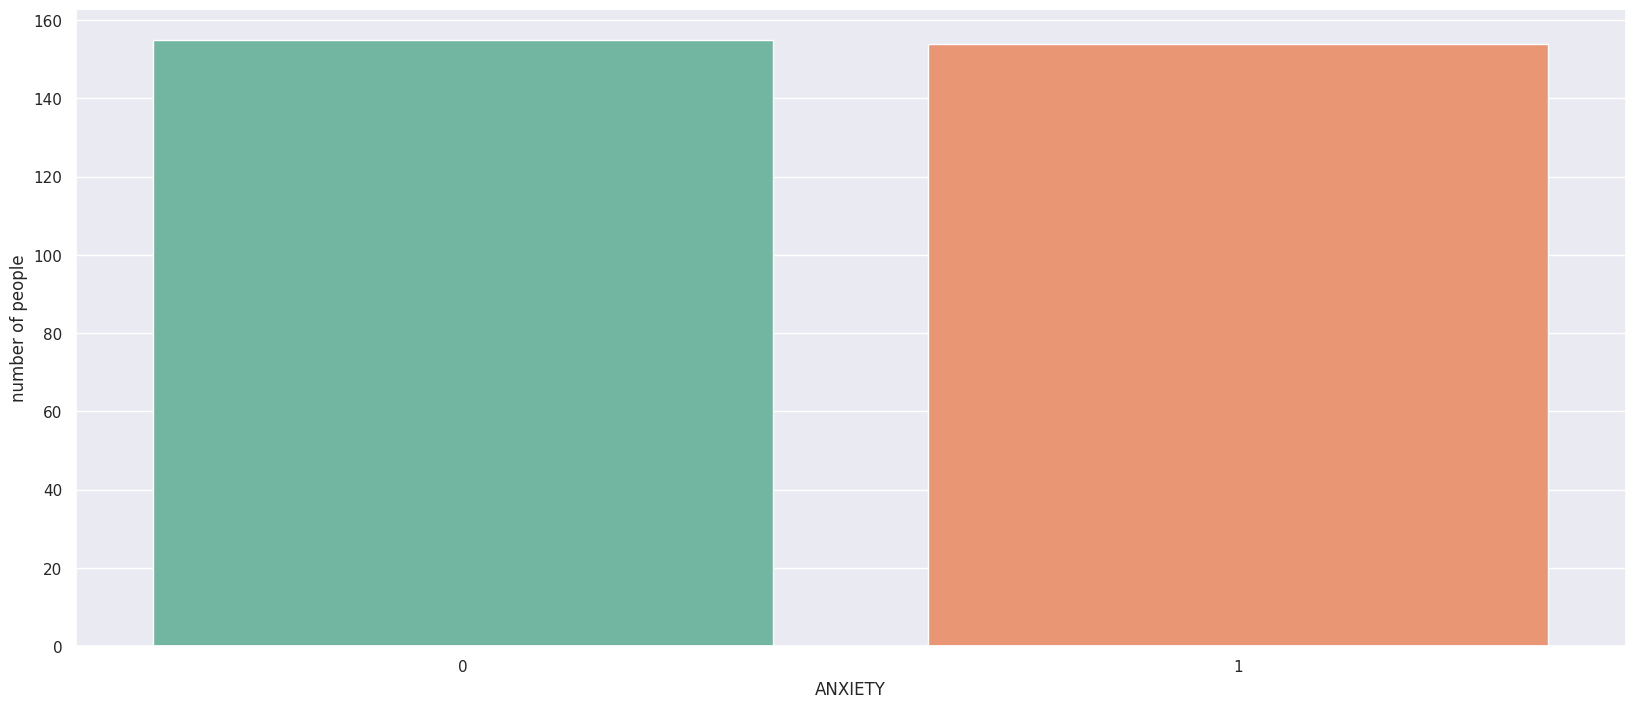

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




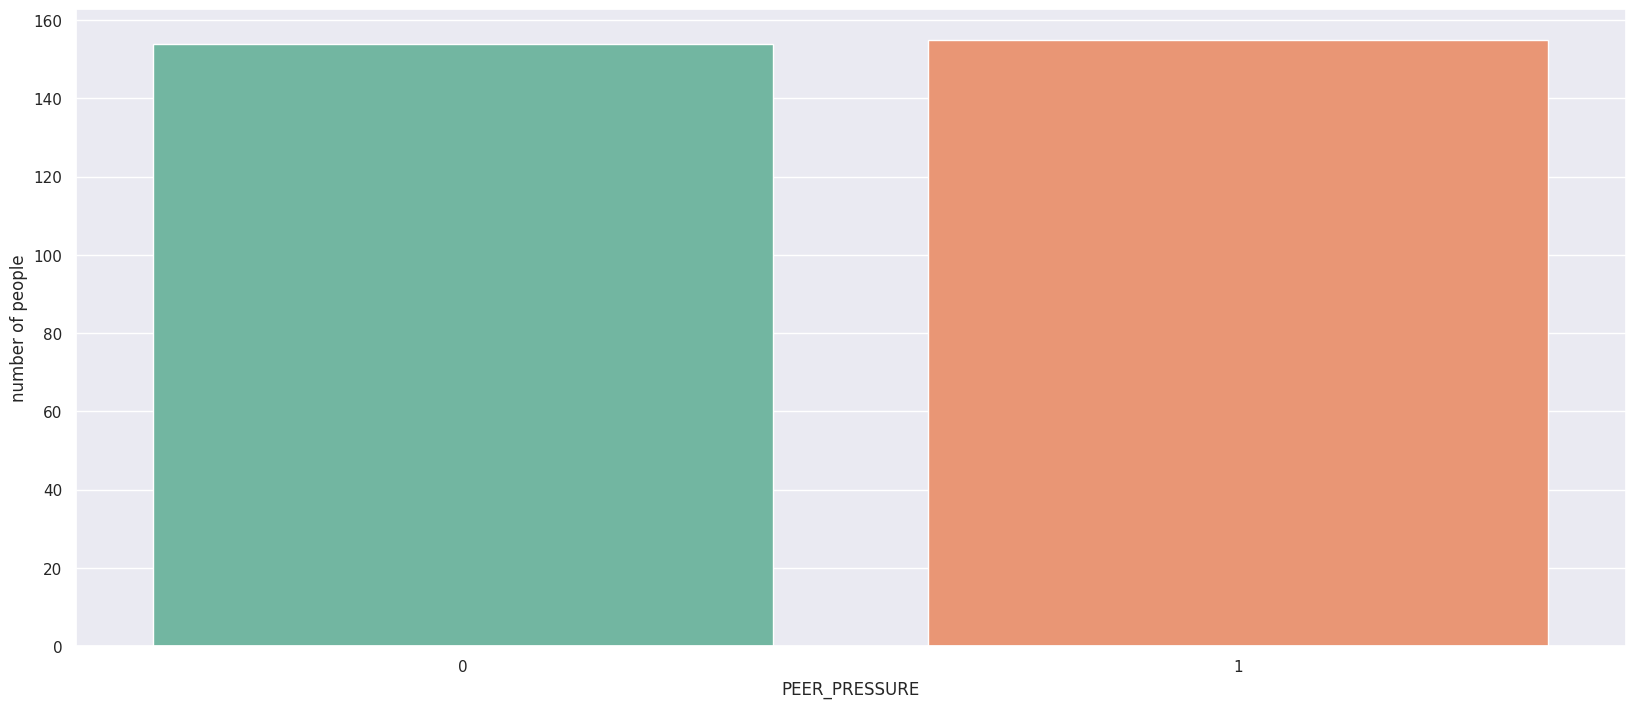

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




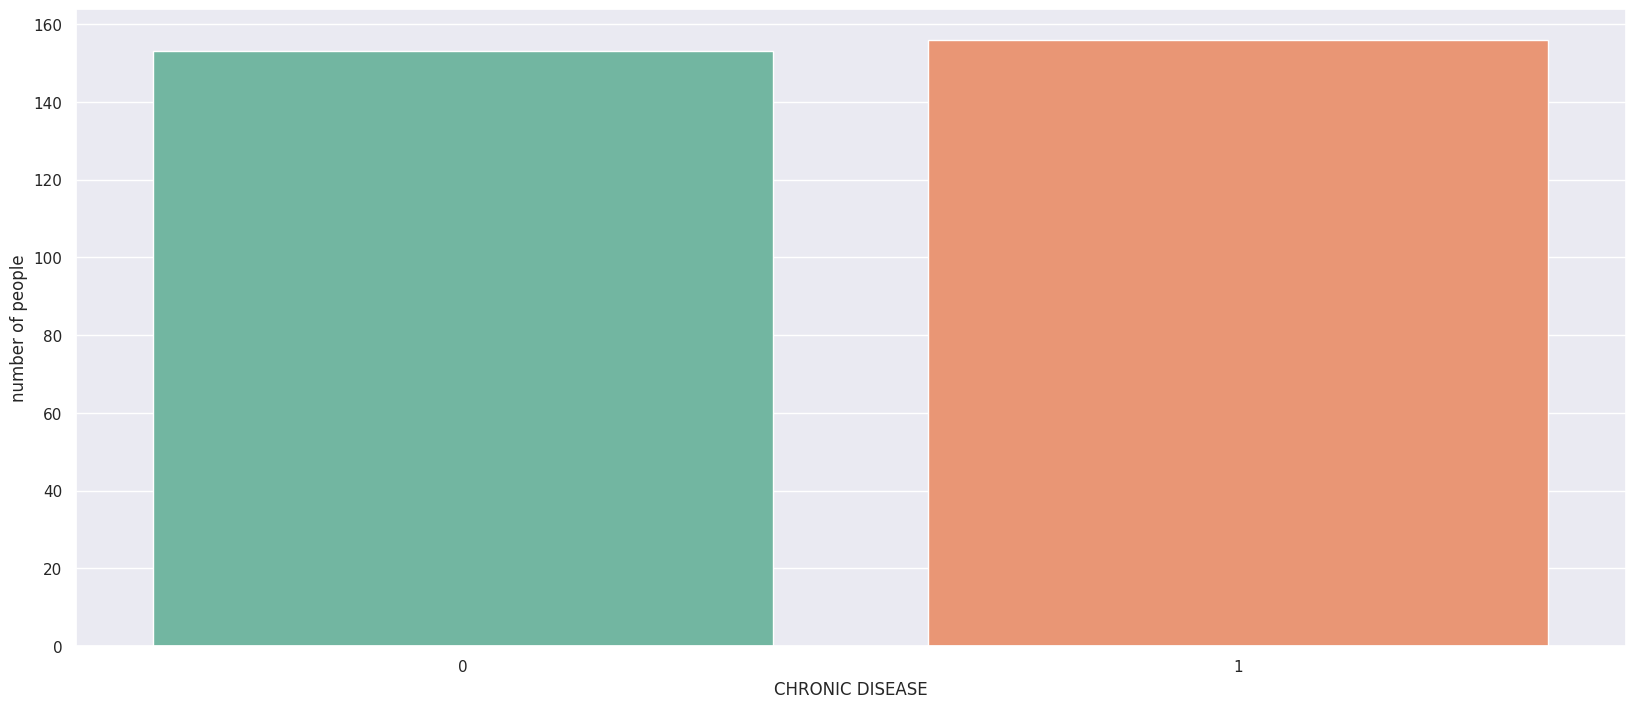

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




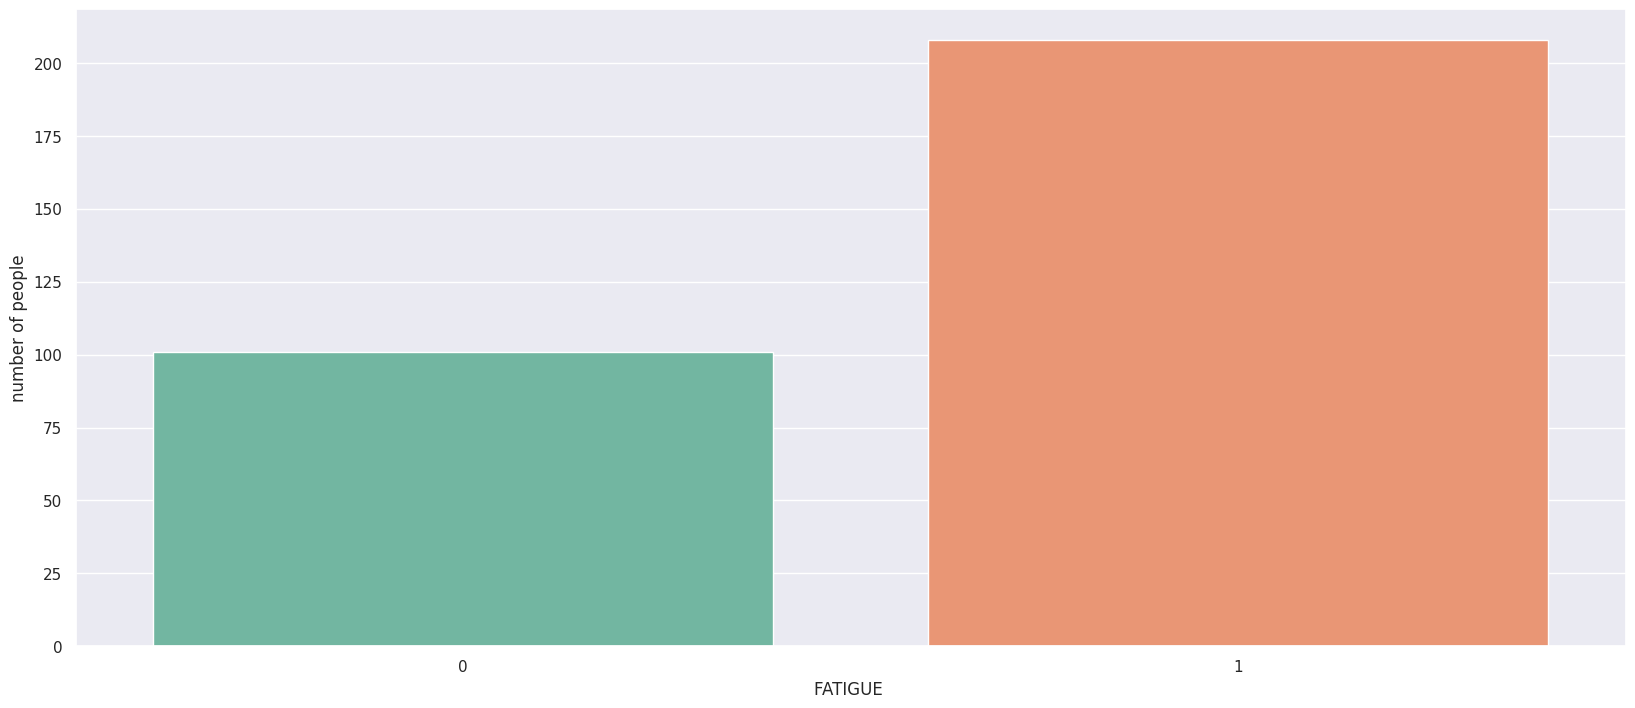

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




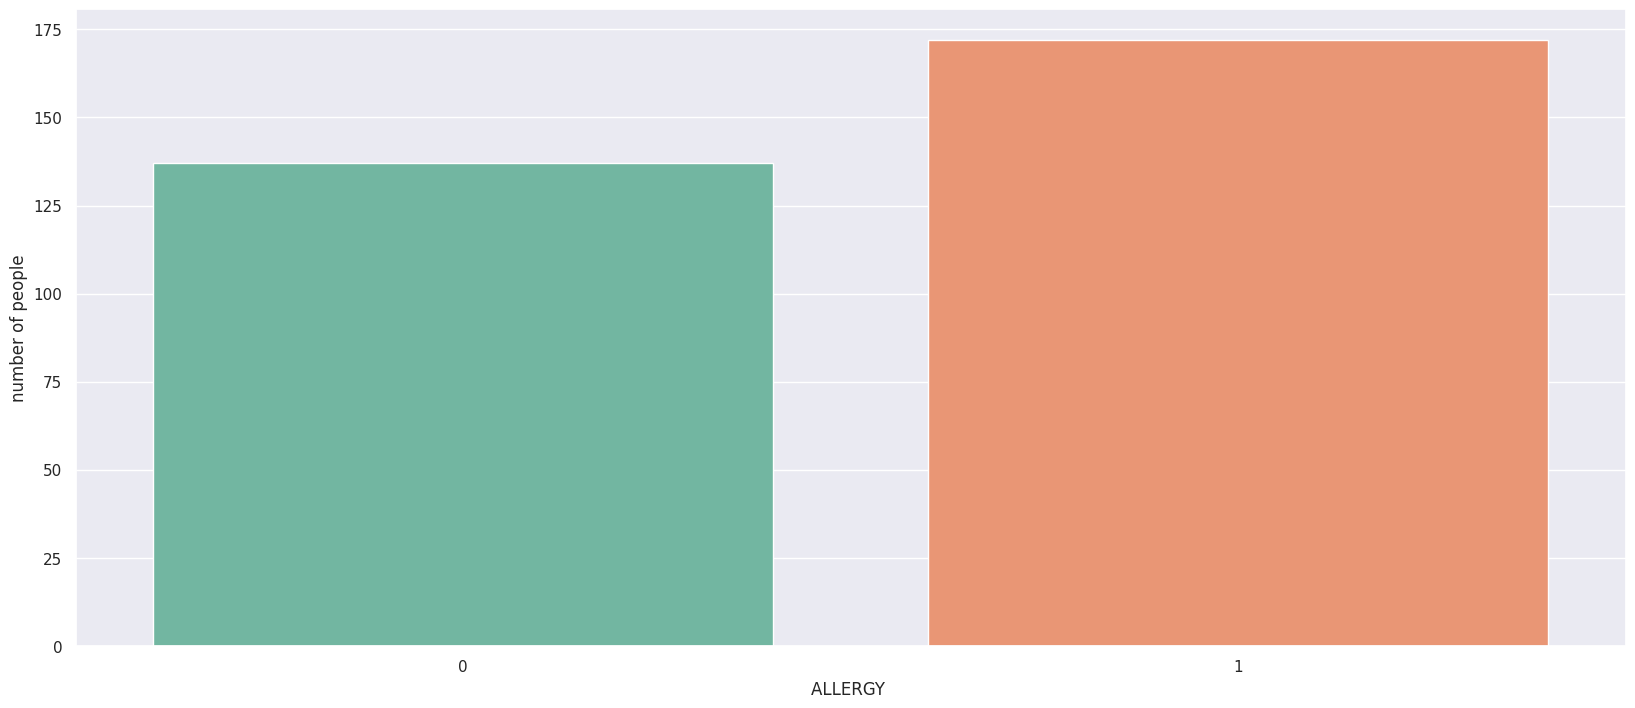

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




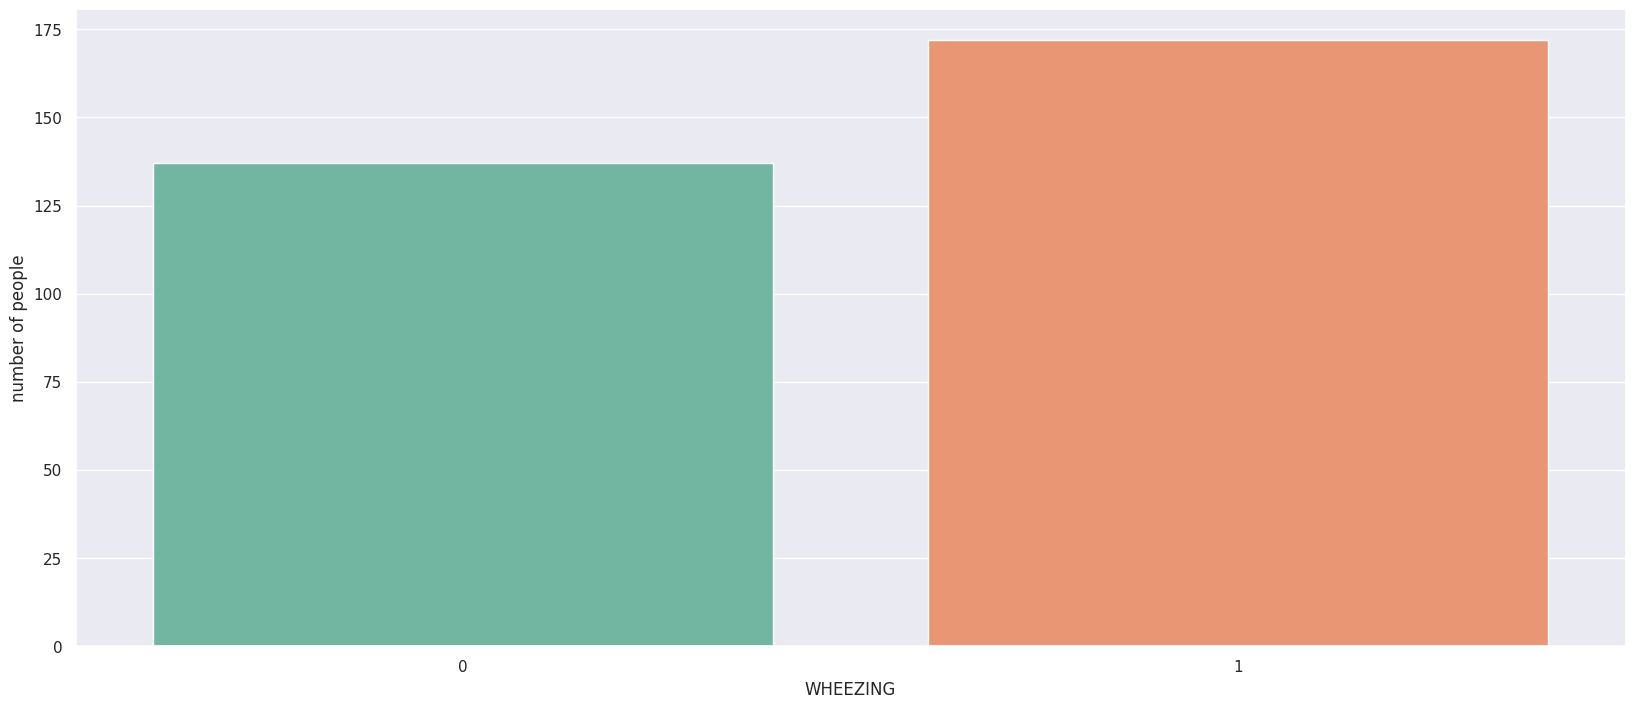

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




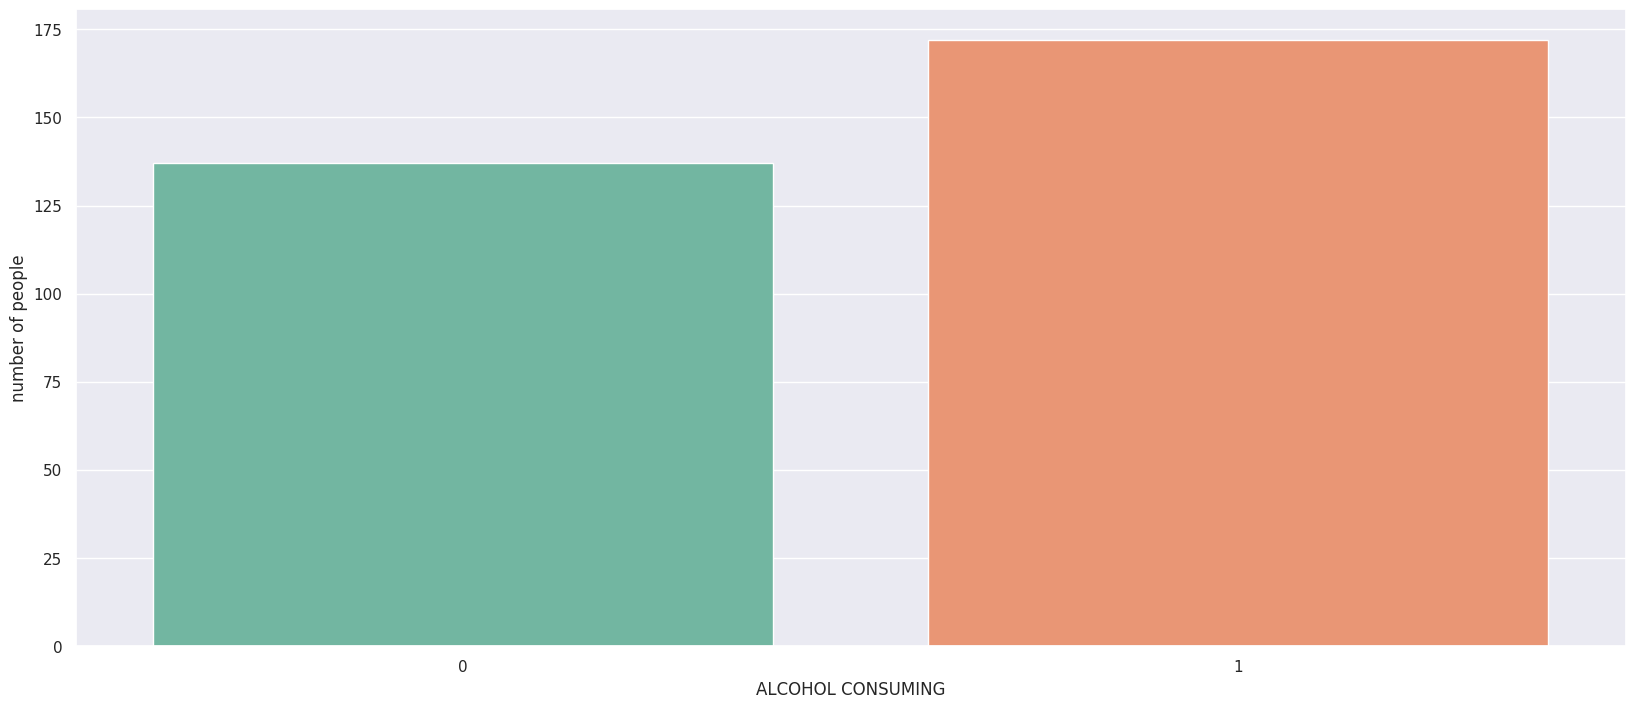

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




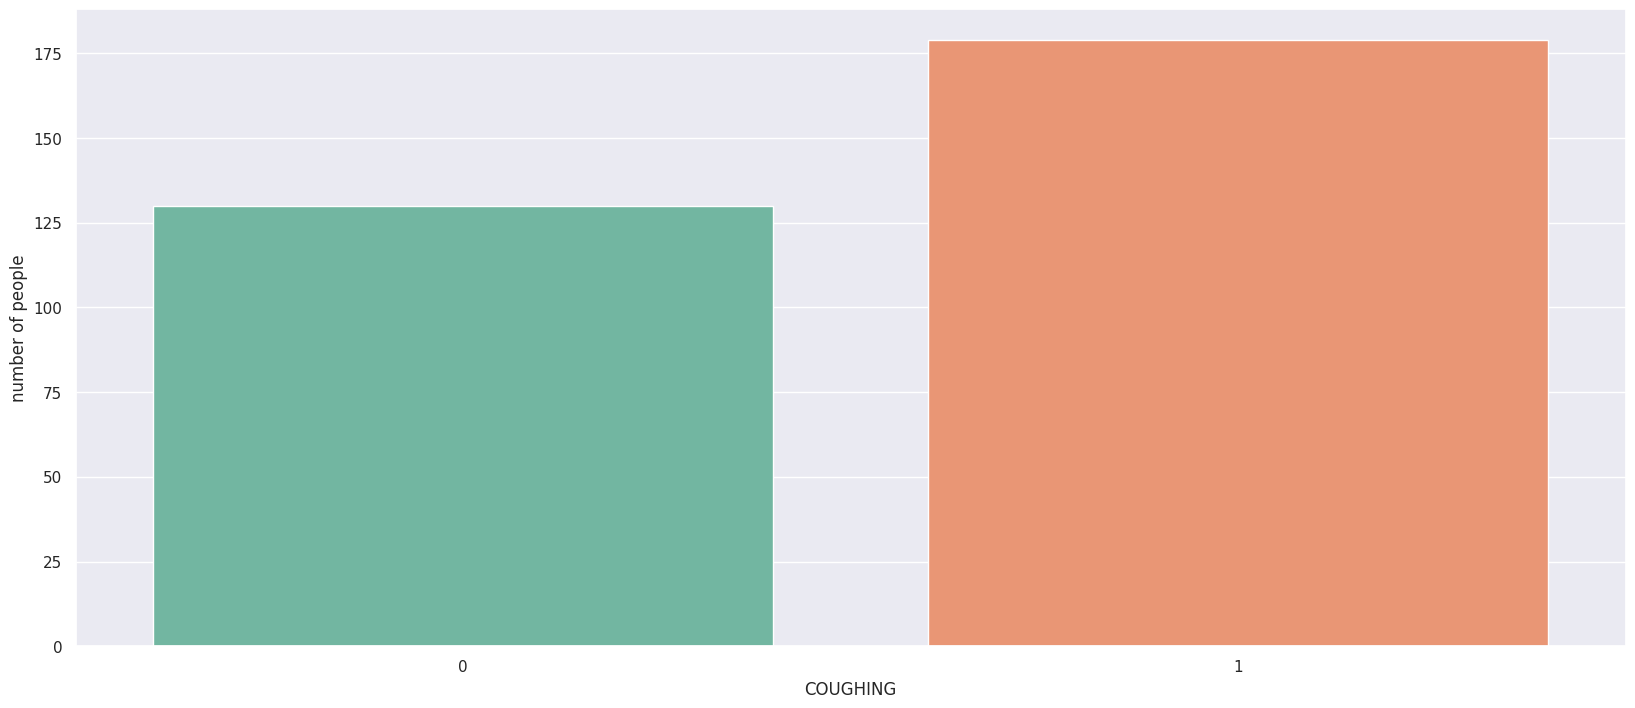

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




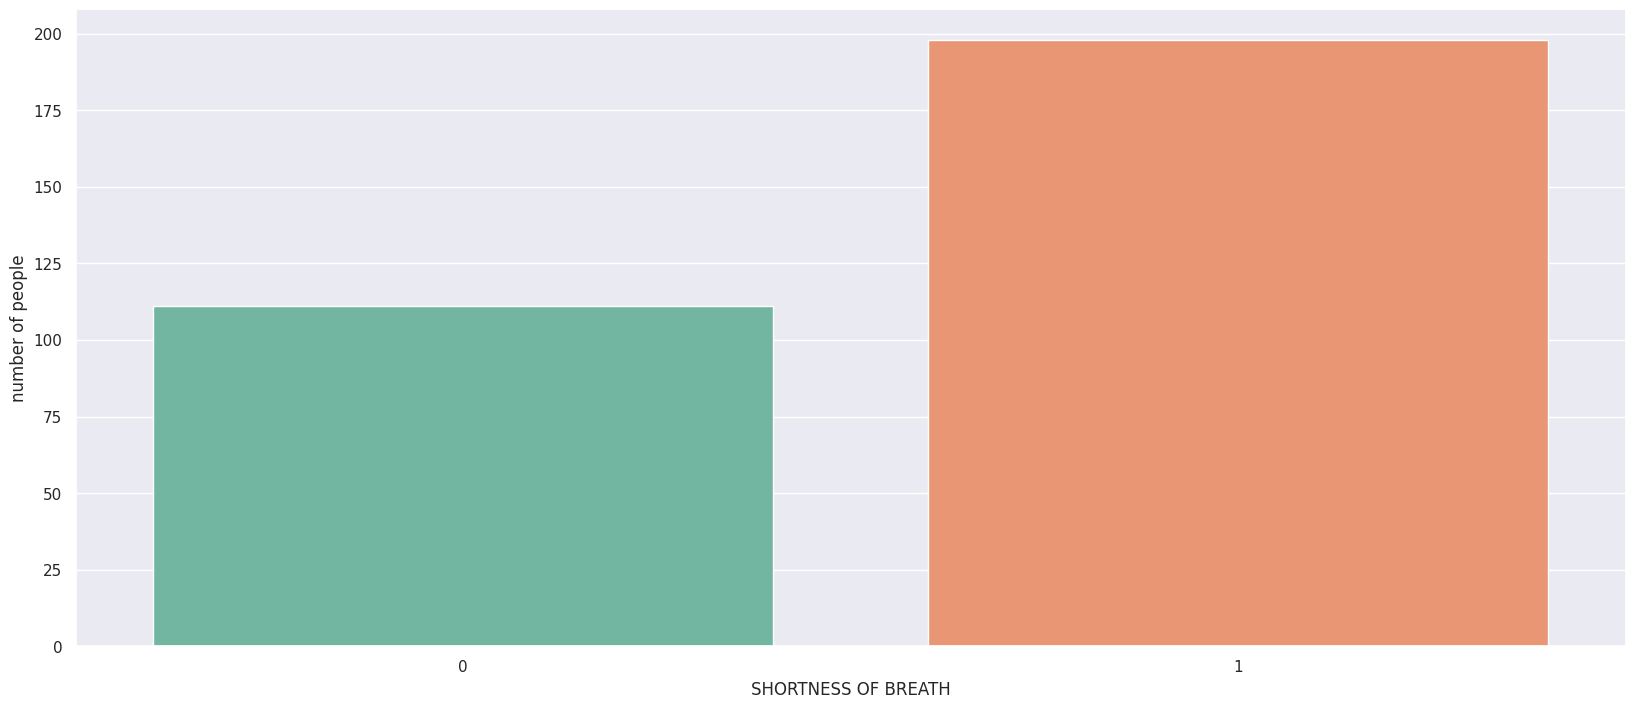

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




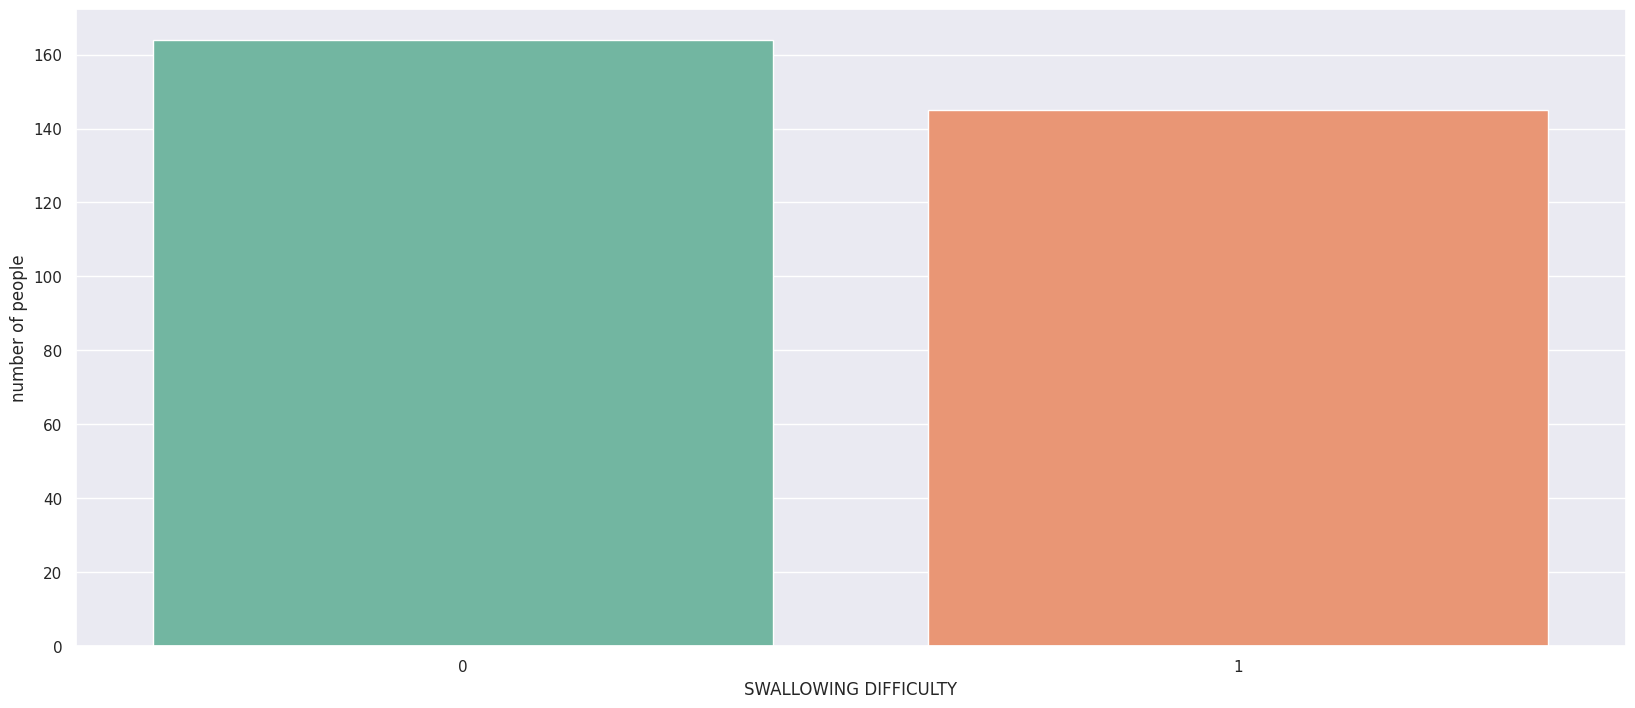

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




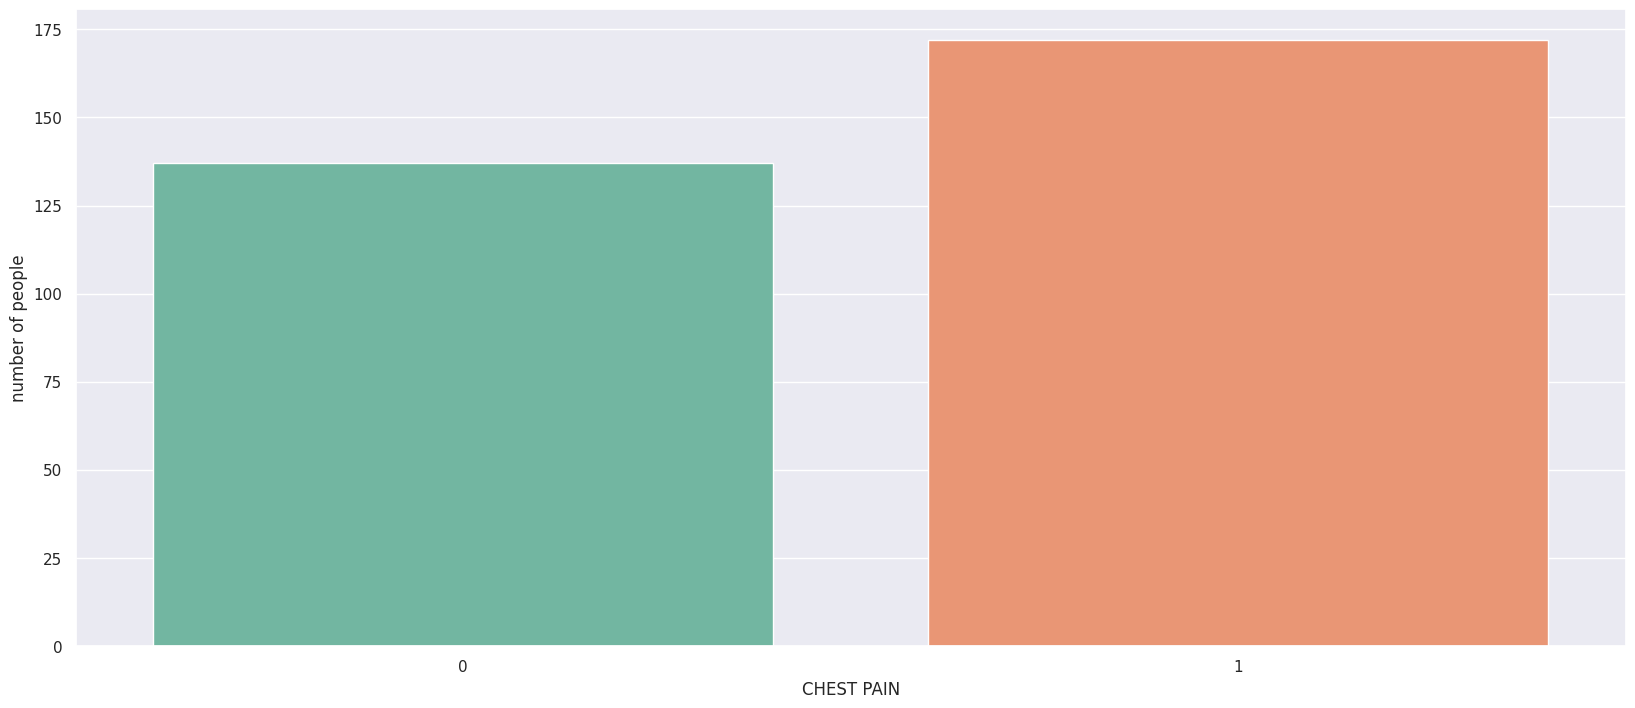

/tmp/ipython-input-1368650226.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




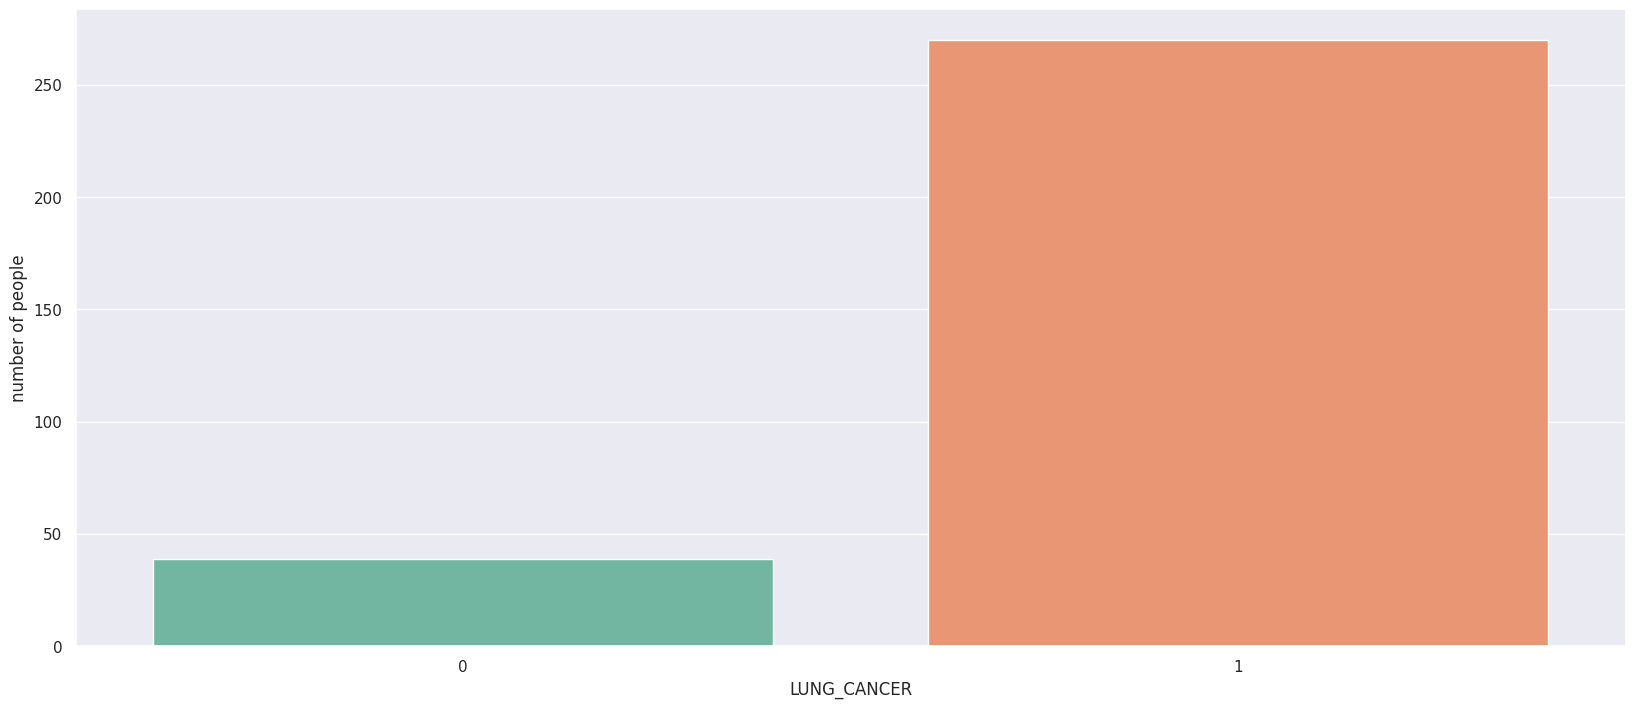

In [289]:
"""for i in data[categorical].columns:
    sns.barplot(x=data[categorical][i].value_counts().index,y=data[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()"""


"""for i in data[categorical].columns:l
    sns.barplot(x=data[categorical][i].value_counts().index,y=data[categorical][i].value_counts(),palette=old_palette)
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()"""



#SeabornUpdate(2023)
for i in data[categorical].columns:
    sns.barplot(x=data[categorical][i].value_counts().index,y=data[categorical][i].value_counts().values,palette="Set2")
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()




In [290]:
data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,270
0,39


In [291]:
from imblearn.over_sampling import SMOTE

In [292]:
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [293]:
y.value_counts()

,count
LUNG_CANCER,
1,270
0,270


In [294]:
y.value_counts()

,count
LUNG_CANCER,
1,270
0,270


In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [296]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

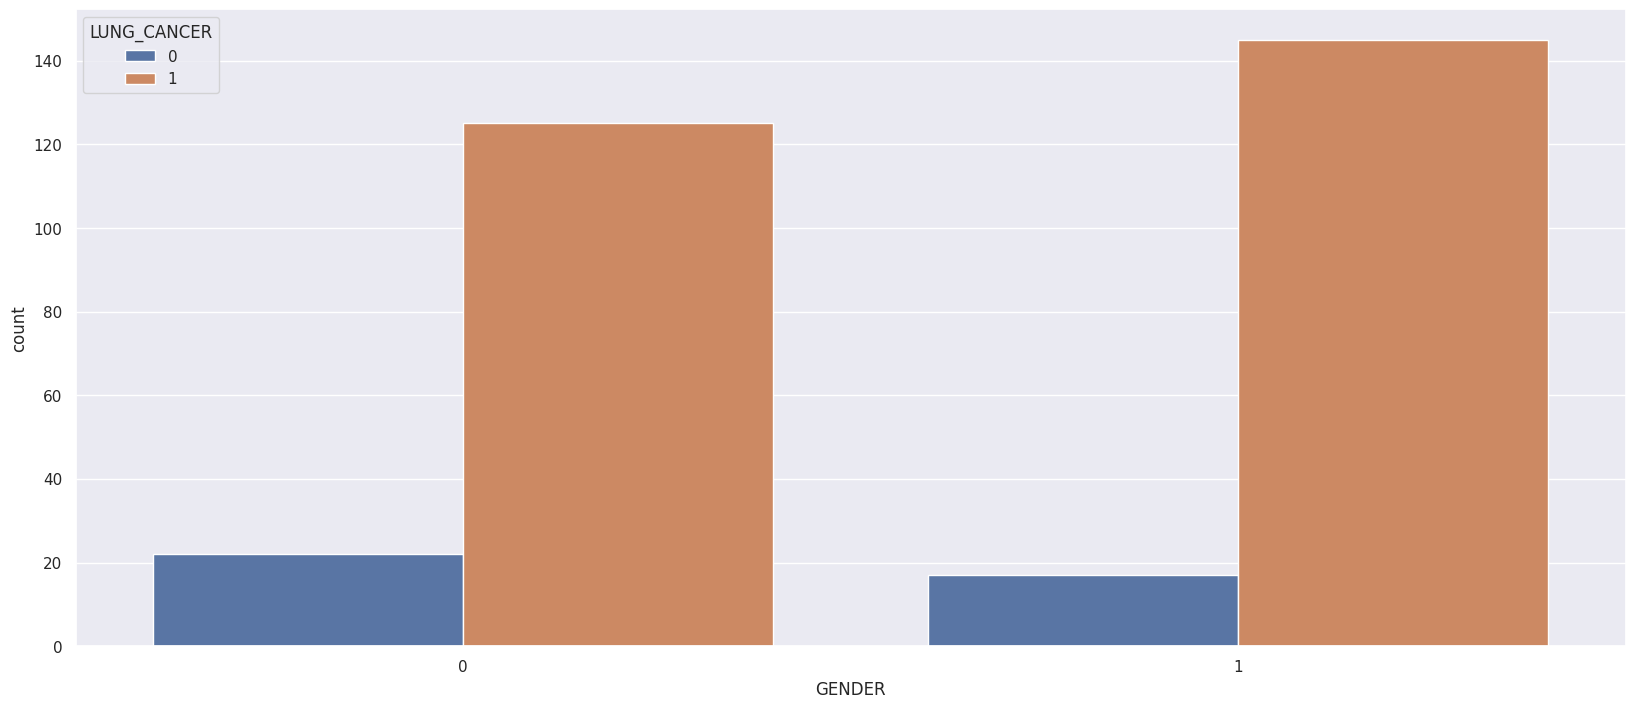

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,8.27)})
sns.countplot(x ='GENDER', hue = "LUNG_CANCER", data = dataset)
plt.show()

In [298]:
#plt.figure(figsize=[30,17])
#sns.barplot(data['AGE'],data['LUNG_CANCER'])
#plt.show()

patients with Lung Cancer: 270
patients without Lung Cancer: 39


/tmp/ipython-input-3079793470.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




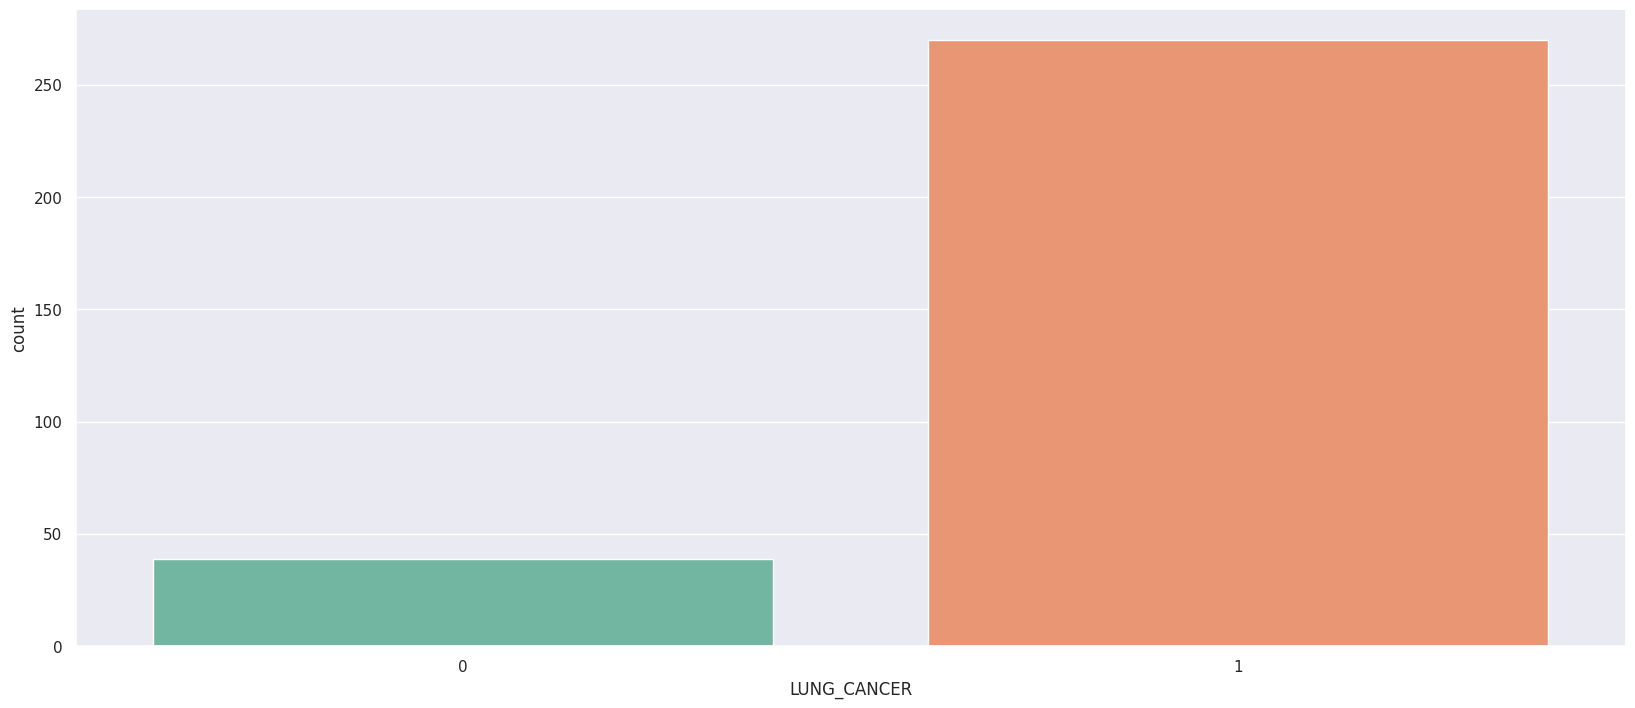

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.countplot(data['LUNG_CANCER'])
#Update
sns.countplot(x='LUNG_CANCER', data=data, palette="Set2")
a,b=data['LUNG_CANCER'].value_counts()
print("patients with Lung Cancer:",a)
print("patients without Lung Cancer:",b)

/tmp/ipython-input-2344790530.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




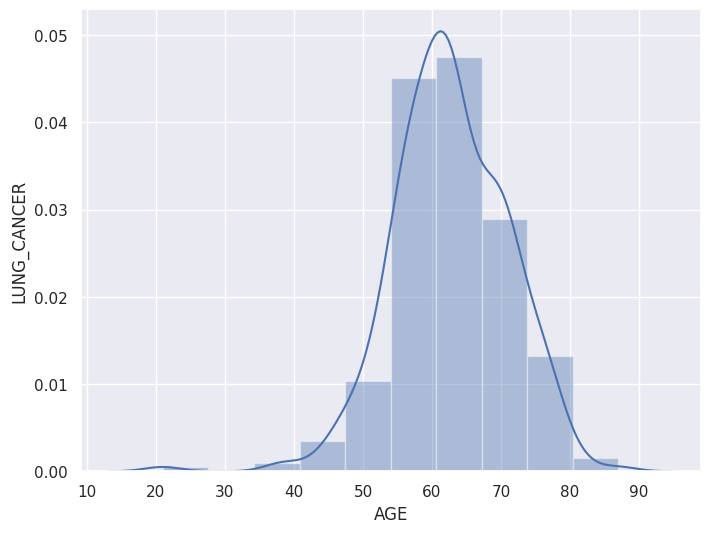

In [300]:
f,ax=plt.subplots(figsize=(8,6))
x=data['AGE']
y=data['LUNG_CANCER']
plt.xlabel('AGE')
plt.ylabel('LUNG_CANCER')
ax=sns.distplot(x,bins=10)
plt.show()

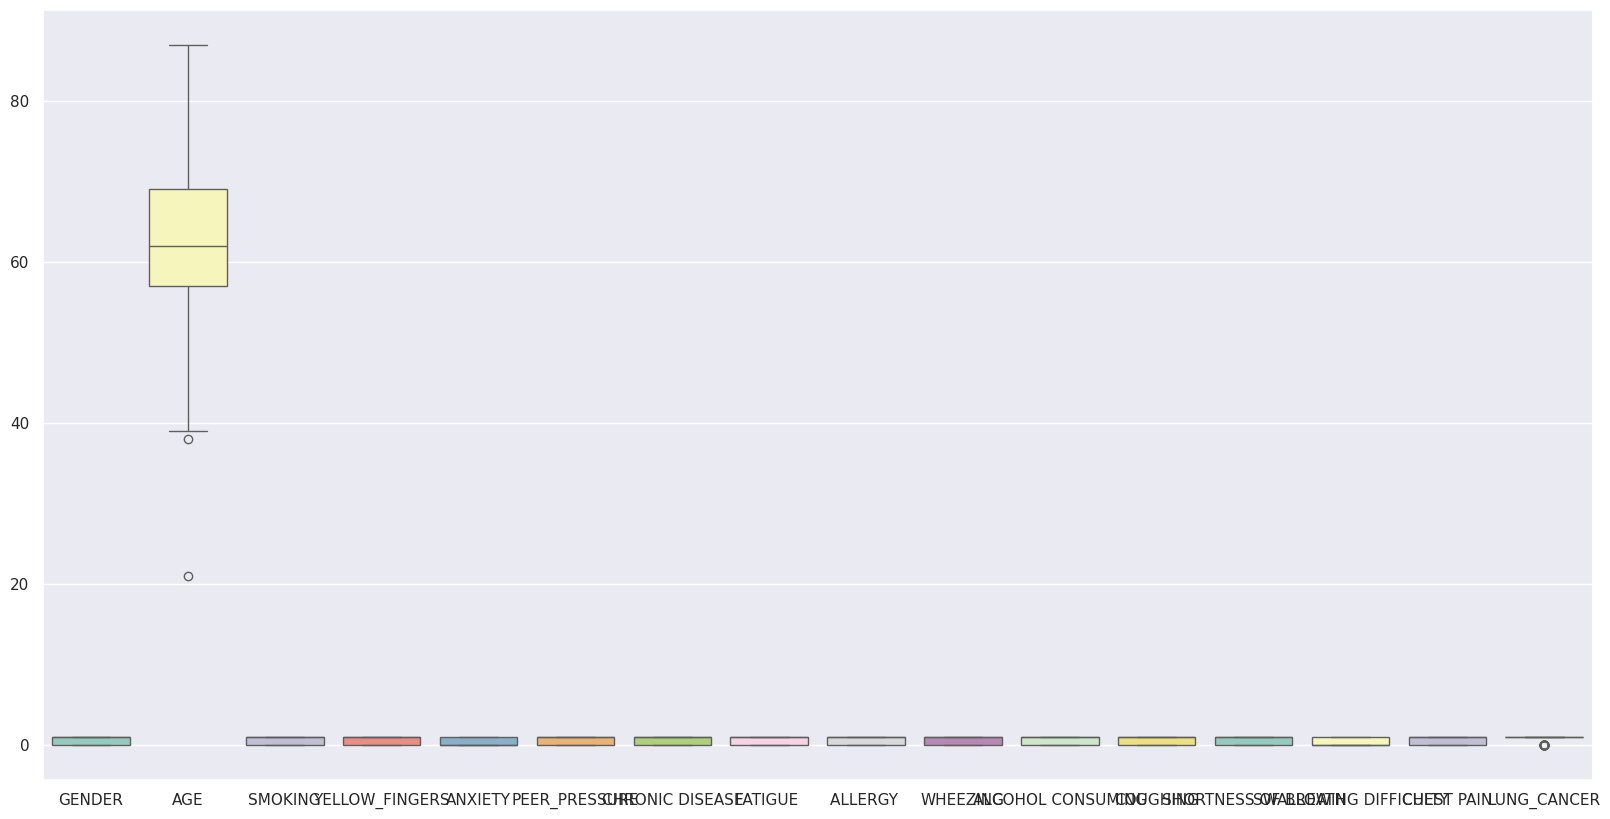

In [301]:
import seaborn as sns
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=data,palette="Set3")
plt.show()

In [302]:
from scipy import stats
z=np.abs(stats.zscore(data))
print(np.where(z>3))

(array([ 22, 238]), array([1, 1]))


In [303]:
df1=data[(z<3).all(axis=1)]
print(data.shape)
print(df1.shape)

(309, 16)
(307, 16)


In [304]:
# import seaborn
# import matplotlib.pyplot as plt
# plt.figure(figsize=[30,19])
# seaborn.pairplot(data, hue ='LUNG_CANCER')
# plt.show()

In [305]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_train,y_train)

GaussianNB()

In [306]:
x=x.to_numpy()

In [307]:
y=y.to_numpy()

In [308]:
x=x.reshape(-1,1)

In [309]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
kf=KFold(n_splits=5)
score=cross_val_score(model1,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74193548 0.98387097 0.87096774 0.91935484 0.83606557]
Average Cross Validation score :0.8704389212057112


In [310]:
y_pred1=model1.predict(x_test)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [311]:
model1.score(x_train,y_train)

0.9432098765432099

In [312]:
a=model1.score(x_test,y_test)
a

0.9037037037037037

In [313]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
print(cm)
accuracy_score(y_test,y_pred1)

[[60 11]
 [ 2 62]]


0.9037037037037037

In [314]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred1,zero_division='warn',output_dict=True)

{'0': {'precision': 0.967741935483871,
  'recall': 0.8450704225352113,
  'f1-score': 0.9022556390977443,
  'support': 71.0},
 '1': {'precision': 0.8493150684931506,
  'recall': 0.96875,
  'f1-score': 0.9051094890510949,
  'support': 64.0},
 'accuracy': 0.9037037037037037,
 'macro avg': {'precision': 0.9085285019885108,
  'recall': 0.9069102112676056,
  'f1-score': 0.9036825640744196,
  'support': 135.0},
 'weighted avg': {'precision': 0.9115988281697517,
  'recall': 0.9037037037037037,
  'f1-score': 0.9036085753719253,
  'support': 135.0}}

In [315]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred1)
recall = recall_score(y_test,y_pred1)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.8493150684931506
Recall:  0.96875


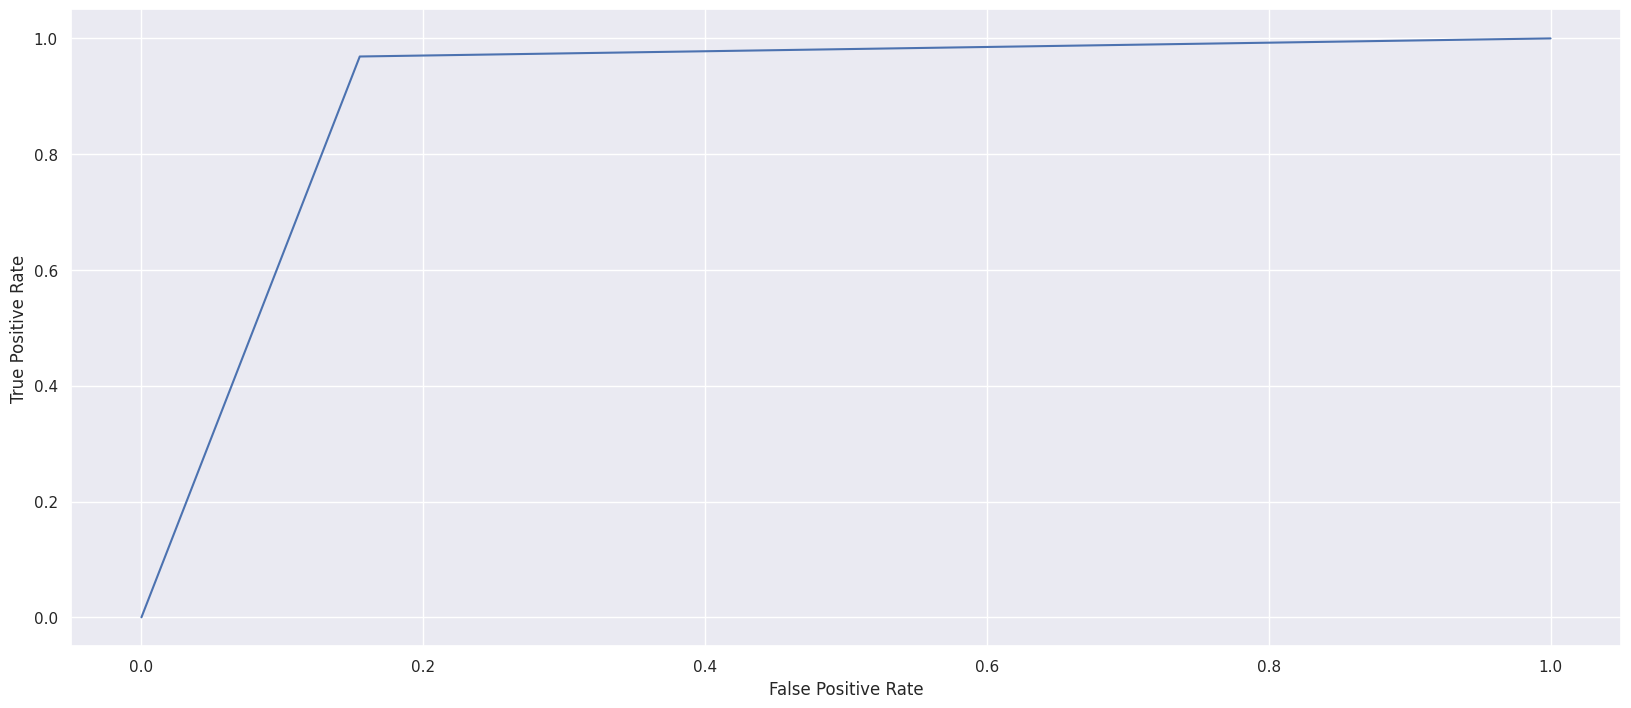

In [316]:
#ROC_CURVE
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred1)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

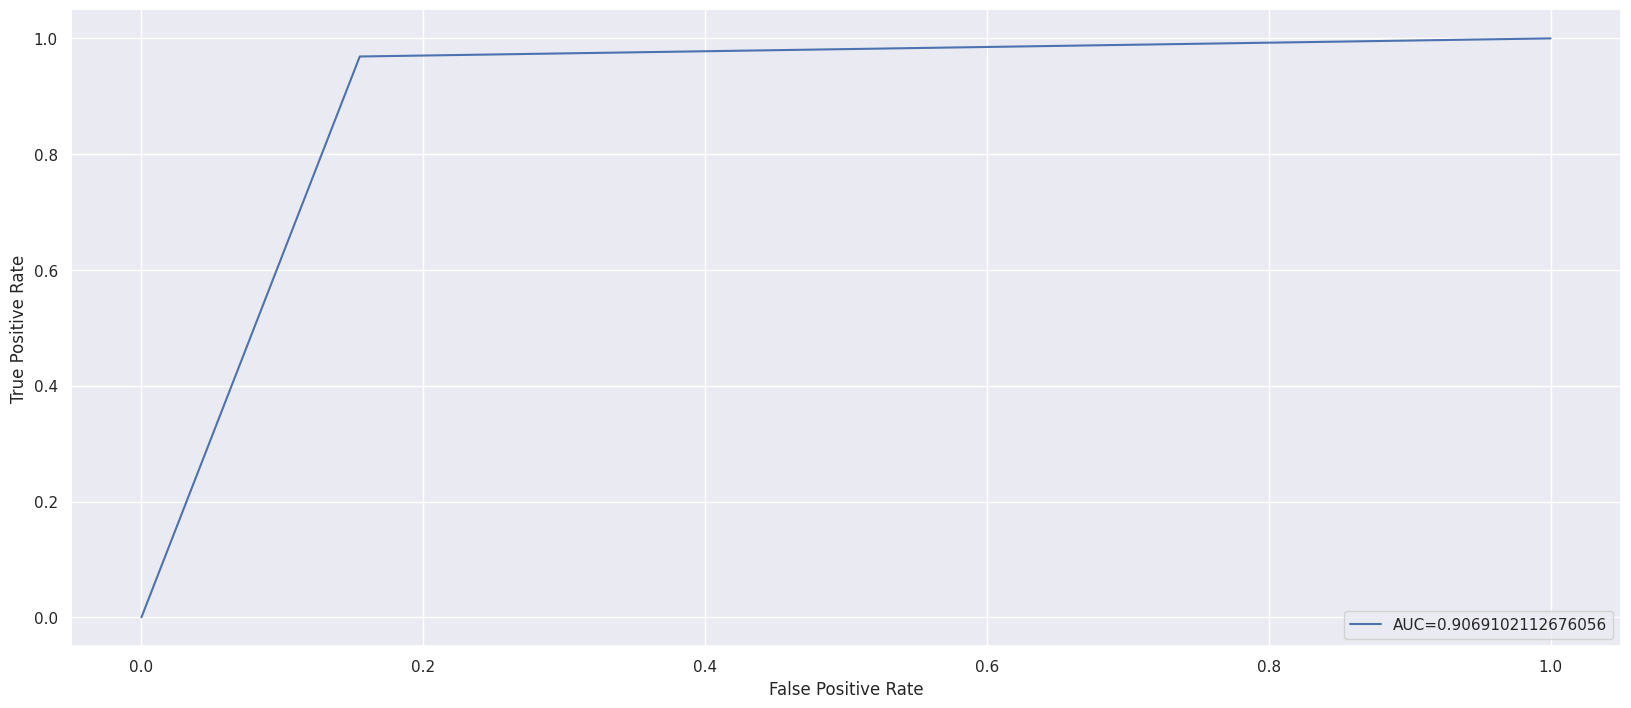

In [317]:
#AUC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [318]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(random_state=0)
model2.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [319]:
#x=x.to_numpy()

In [320]:
#y=y.to_numpy()

In [321]:
x=x.reshape(-1,1)

In [322]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
kf=KFold(n_splits=5)
score=cross_val_score(model2,x,y,cv=kf, error_score='raise')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74193548 0.98387097 0.87096774 0.93548387 0.83606557]
Average Cross Validation score :0.8736647276573242


In [323]:
y_pred2=model2.predict(x_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [324]:
model2.score(x_train,y_train)

0.9703703703703703

In [325]:
b=model2.score(x_test,y_test)
b

0.9777777777777777

In [326]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred2)
print(cm)
accuracy_score(y_test,y_pred2)

[[70  1]
 [ 2 62]]


0.9777777777777777

In [327]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred2,zero_division='warn',output_dict=True)

{'0': {'precision': 0.9722222222222222,
  'recall': 0.9859154929577465,
  'f1-score': 0.9790209790209791,
  'support': 71.0},
 '1': {'precision': 0.9841269841269841,
  'recall': 0.96875,
  'f1-score': 0.9763779527559056,
  'support': 64.0},
 'accuracy': 0.9777777777777777,
 'macro avg': {'precision': 0.9781746031746031,
  'recall': 0.9773327464788732,
  'f1-score': 0.9776994658884424,
  'support': 135.0},
 'weighted avg': {'precision': 0.9778659611992945,
  'recall': 0.9777777777777777,
  'f1-score': 0.977767988791611,
  'support': 135.0}}

In [328]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred2)
recall = recall_score(y_test,y_pred2)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9841269841269841
Recall:  0.96875


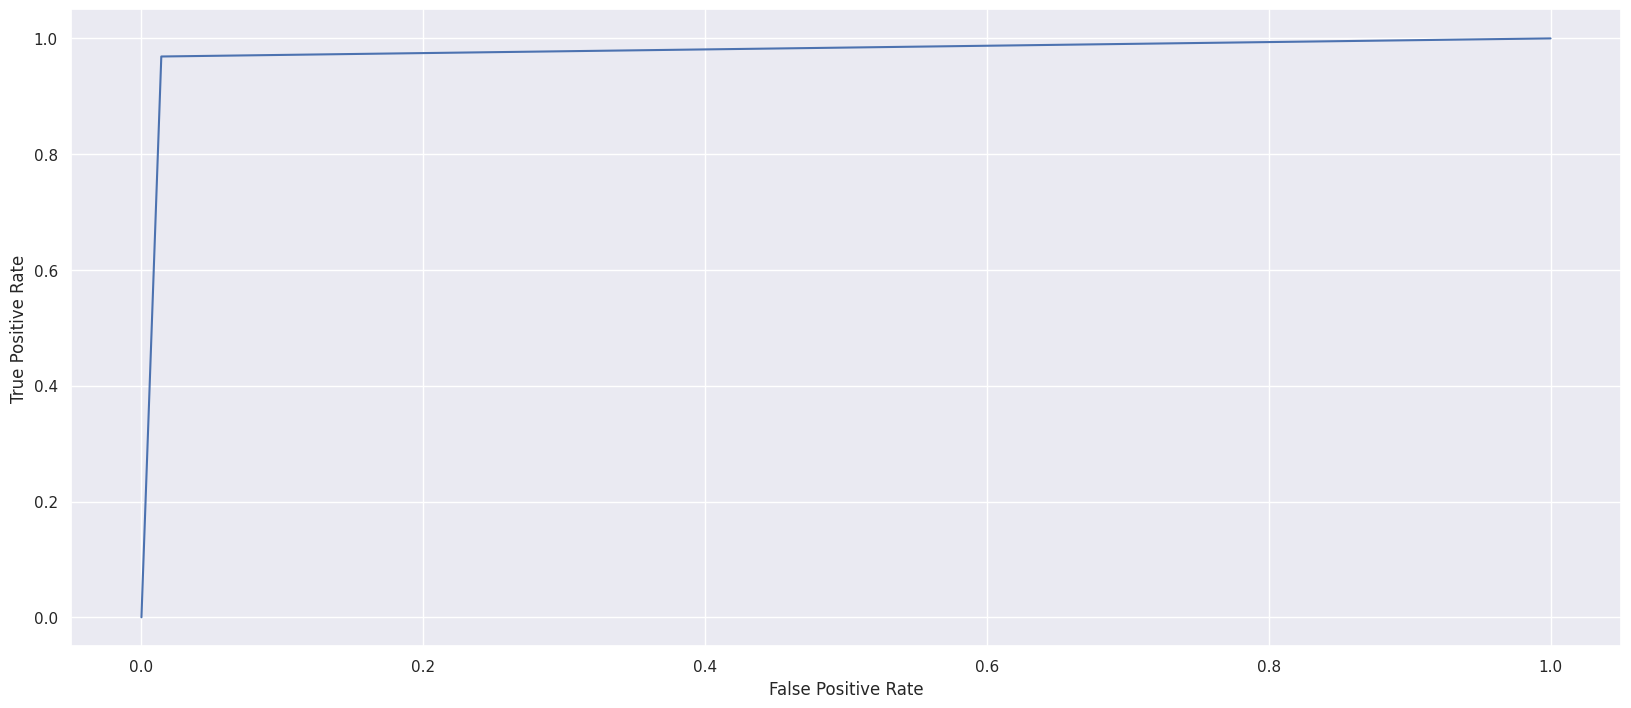

In [329]:
#ROC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred2)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

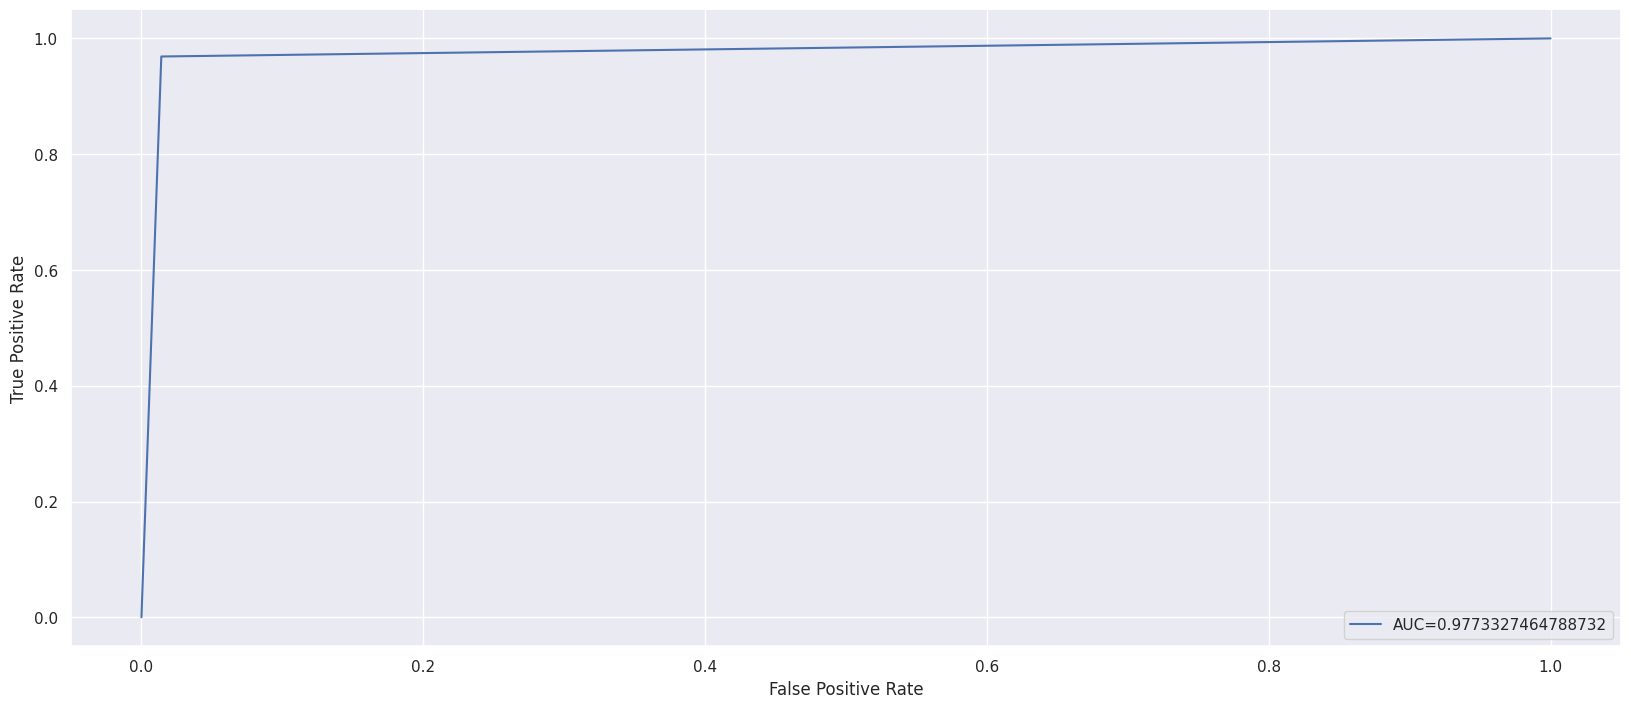

In [330]:
#AUC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)
#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [331]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(random_state=0)
model3.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [332]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
kf=KFold(n_splits=5)
score=cross_val_score(model3,x,y,cv=kf, error_score='raise')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74193548 0.93548387 0.87096774 0.93548387 0.83606557]
Average Cross Validation score :0.8639873083024854


In [333]:
y_pred3=model3.predict(x_test)
y_pred3

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1])

In [334]:
model3.score(x_train,y_train)

1.0

In [335]:
c=model3.score(x_test,y_test)
c

0.9481481481481482

In [336]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred3)
print(cm)
accuracy_score(y_test,y_pred3)

[[69  2]
 [ 5 59]]


0.9481481481481482

In [337]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred3,zero_division='warn',output_dict=True)

{'0': {'precision': 0.9324324324324325,
  'recall': 0.971830985915493,
  'f1-score': 0.9517241379310345,
  'support': 71.0},
 '1': {'precision': 0.9672131147540983,
  'recall': 0.921875,
  'f1-score': 0.944,
  'support': 64.0},
 'accuracy': 0.9481481481481482,
 'macro avg': {'precision': 0.9498227735932654,
  'recall': 0.9468529929577465,
  'f1-score': 0.9478620689655173,
  'support': 135.0},
 'weighted avg': {'precision': 0.9489210521997408,
  'recall': 0.9481481481481482,
  'f1-score': 0.9480623243933589,
  'support': 135.0}}

In [338]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred3)
recall = recall_score(y_test,y_pred3)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9672131147540983
Recall:  0.921875


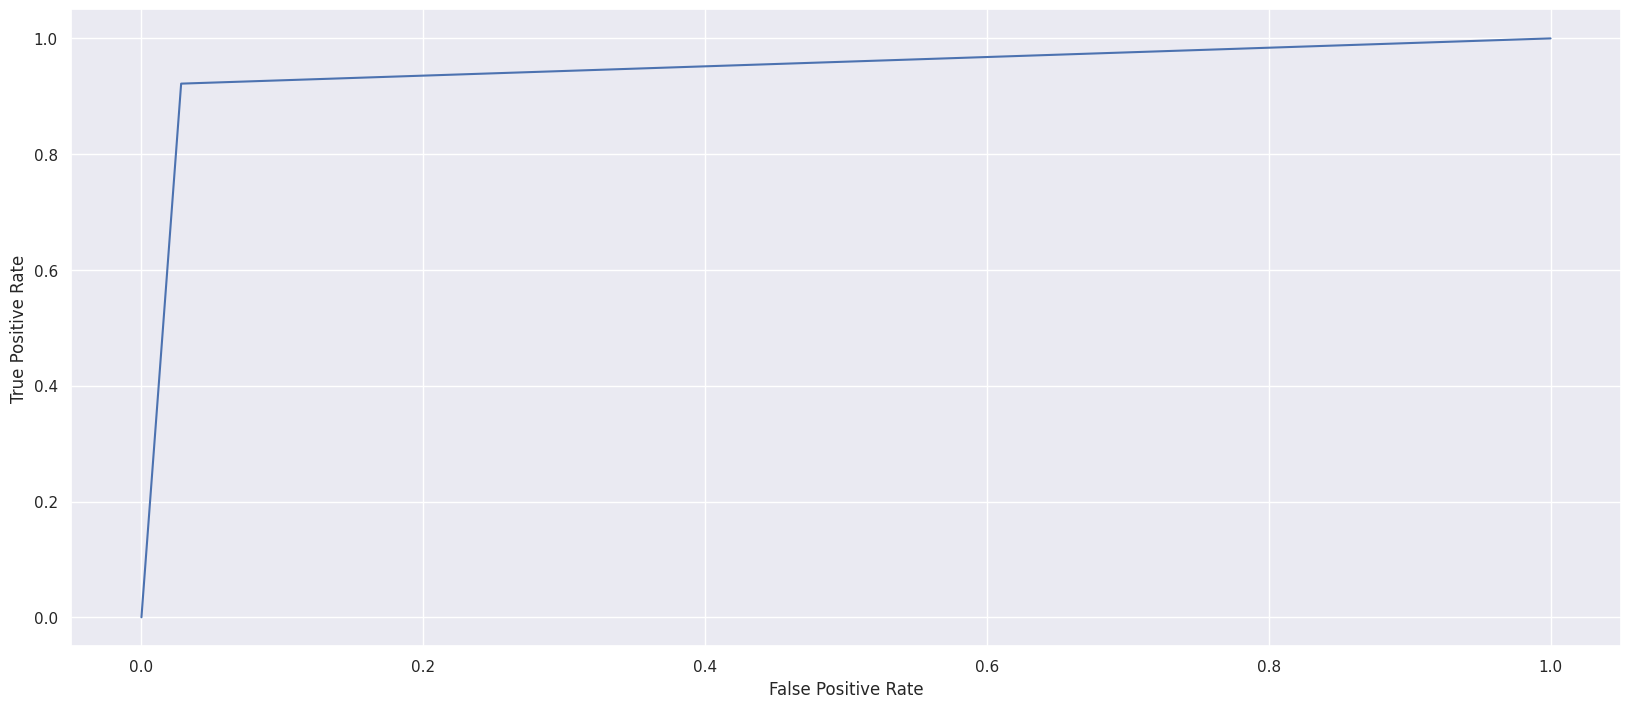

In [339]:
#ROC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred3)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

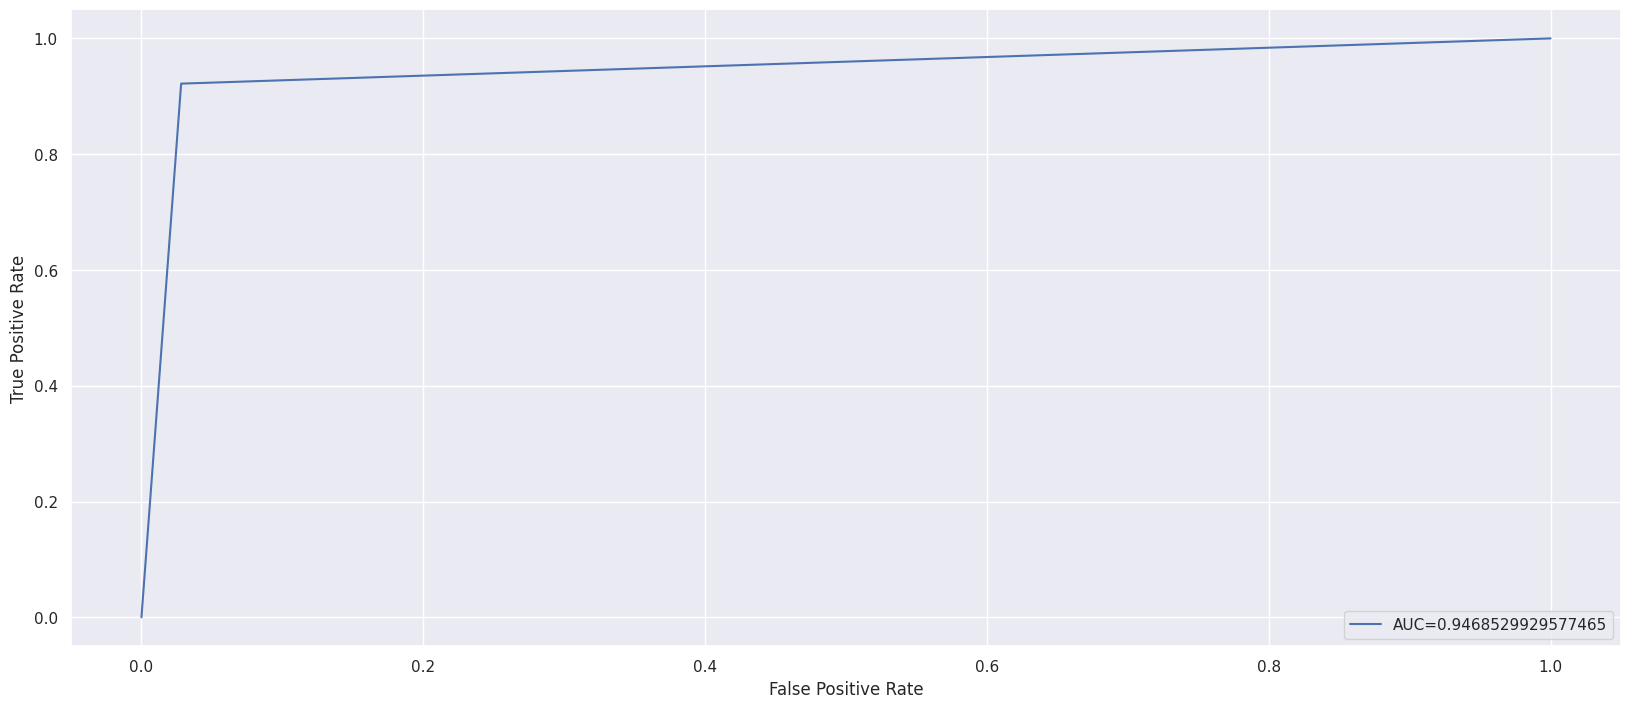

In [340]:
#AUC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred3)
auc = metrics.roc_auc_score(y_test, y_pred3)
#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

[Text(0.7006578947368421, 0.95, 'x[8] <= 0.342\ngini = 0.5\nsamples = 405\nvalue = [199, 206]'),
 Text(0.5592105263157895, 0.85, 'x[13] <= 0.542\ngini = 0.396\nsamples = 268\nvalue = [195, 73]'),
 Text(0.6299342105263158, 0.8999999999999999, 'True  '),
 Text(0.3815789473684211, 0.75, 'x[10] <= 0.313\ngini = 0.228\nsamples = 221\nvalue = [192, 29]'),
 Text(0.23684210526315788, 0.65, 'x[5] <= 0.446\ngini = 0.146\nsamples = 202\nvalue = [186, 16]'),
 Text(0.13157894736842105, 0.55, 'x[6] <= 0.279\ngini = 0.063\nsamples = 183\nvalue = [177, 6]'),
 Text(0.07894736842105263, 0.45, 'x[1] <= -0.907\ngini = 0.014\nsamples = 144\nvalue = [143, 1]'),
 Text(0.05263157894736842, 0.35, 'x[7] <= -0.072\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.02631578947368421, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.07894736842105263, 0.25, 'x[12] <= -0.112\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.05263157894736842, 0.15, 'x[0] <= 0.247\ngini = 0.375\nsamples = 4\nvalue

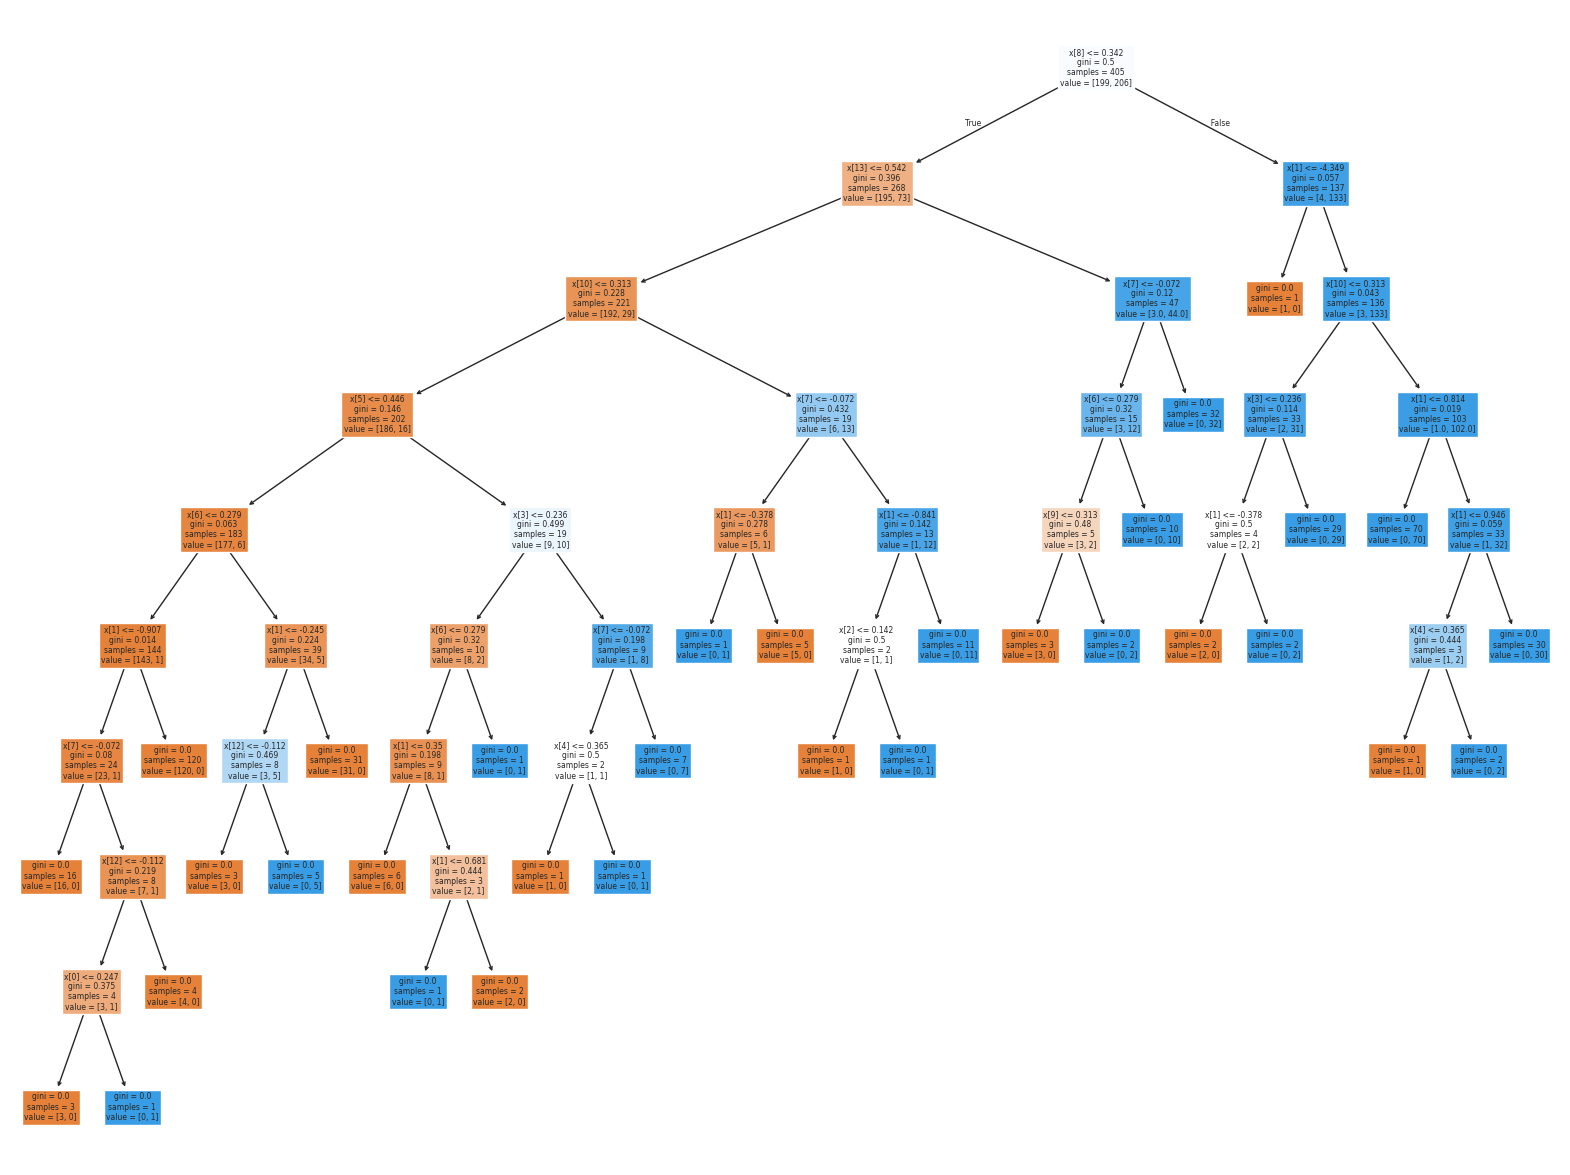

In [341]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model3,filled=True)

In [342]:
print(tree.export_text(model3))

|--- feature_8 <= 0.34
|   |--- feature_13 <= 0.54
|   |   |--- feature_10 <= 0.31
|   |   |   |--- feature_5 <= 0.45
|   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |--- feature_1 <= -0.91
|   |   |   |   |   |   |--- feature_7 <= -0.07
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  -0.07
|   |   |   |   |   |   |   |--- feature_12 <= -0.11
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.25
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.25
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_12 >  -0.11
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  -0.91
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |--- feature_1 <= -0.25
|   |   |   |   |   |   |--- feature_12 <= -0.11
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_12 >  

In [343]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(random_state=0)
model4.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [344]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
kf=KFold(n_splits=5)
score=cross_val_score(model4,x,y,cv=kf, error_score='raise')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74193548 0.93548387 0.87096774 0.93548387 0.83606557]
Average Cross Validation score :0.8639873083024854


In [345]:
y_pred4=model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1])

In [346]:
model4.score(x_train,y_train)

1.0

In [347]:
d=model4.score(x_test,y_test)
d

0.9333333333333333

In [348]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred4)
print(cm)
accuracy_score(y_test,y_pred4)

[[69  2]
 [ 7 57]]


0.9333333333333333

In [349]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred4,zero_division='warn',output_dict=True)

{'0': {'precision': 0.9078947368421053,
  'recall': 0.971830985915493,
  'f1-score': 0.9387755102040817,
  'support': 71.0},
 '1': {'precision': 0.9661016949152542,
  'recall': 0.890625,
  'f1-score': 0.926829268292683,
  'support': 64.0},
 'accuracy': 0.9333333333333333,
 'macro avg': {'precision': 0.9369982158786798,
  'recall': 0.9312279929577465,
  'f1-score': 0.9328023892483823,
  'support': 135.0},
 'weighted avg': {'precision': 0.9354891465953019,
  'recall': 0.9333333333333333,
  'f1-score': 0.9331121066312705,
  'support': 135.0}}

In [350]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred4)
recall = recall_score(y_test,y_pred4)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9661016949152542
Recall:  0.890625


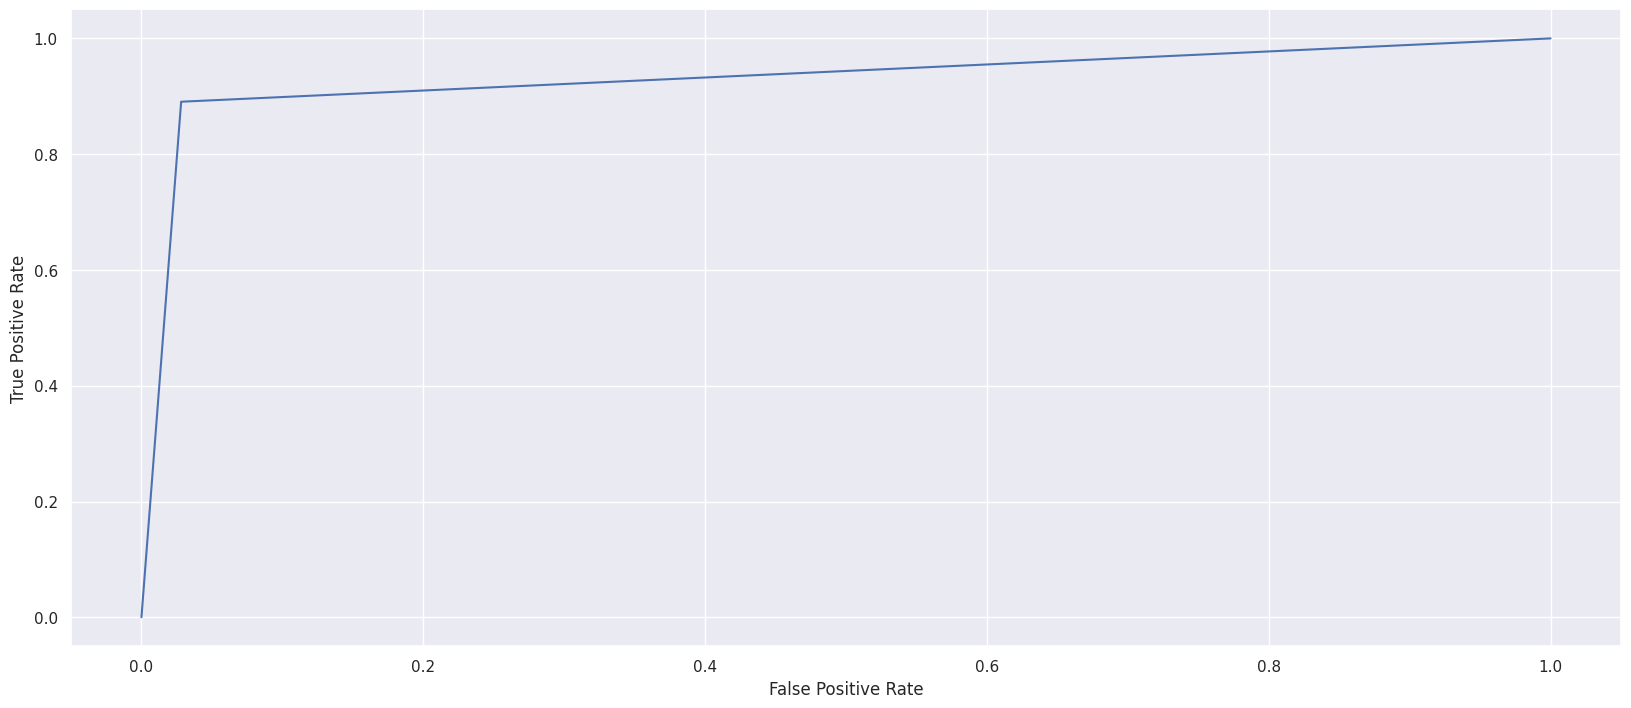

In [351]:
#ROC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred4)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

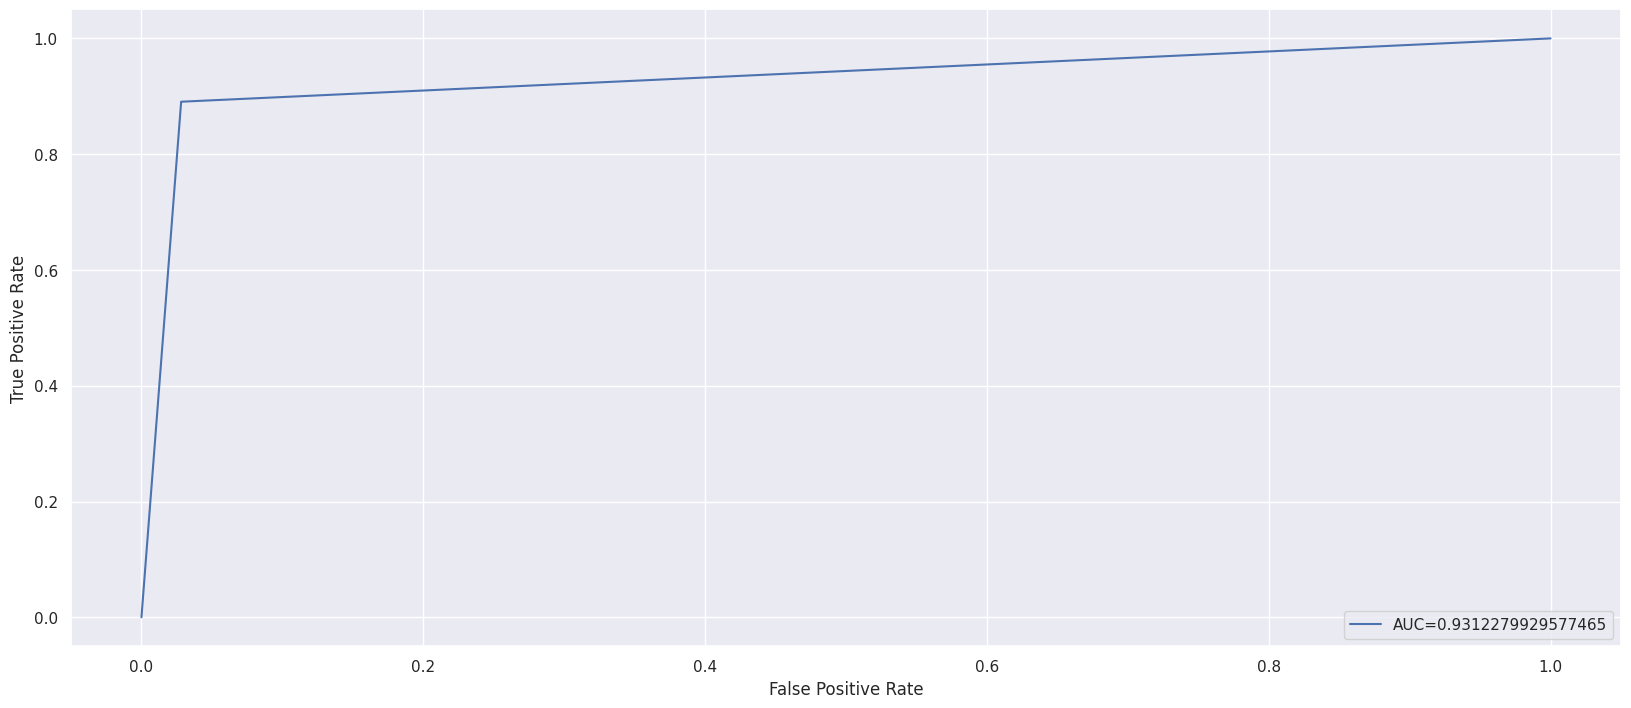

In [352]:
#AUC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred4)
auc = metrics.roc_auc_score(y_test, y_pred4)
#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [353]:
from sklearn.svm import SVC
model5=SVC(kernel='linear',random_state=0)
model5.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [354]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
kf=KFold(n_splits=5)
score=cross_val_score(model5,x,y,cv=kf, error_score='raise')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74193548 0.98387097 0.87096774 0.93548387 0.83606557]
Average Cross Validation score :0.8736647276573242


In [355]:
y_pred5=model5.predict(x_test)
y_pred5

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [356]:
model5.score(x_train,y_train)

0.9604938271604938

In [357]:
e=model5.score(x_test,y_test)
e

0.9777777777777777

In [358]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred5)
print(cm)
accuracy_score(y_test,y_pred5)

[[70  1]
 [ 2 62]]


0.9777777777777777

In [359]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred5,zero_division='warn',output_dict=True)

{'0': {'precision': 0.9722222222222222,
  'recall': 0.9859154929577465,
  'f1-score': 0.9790209790209791,
  'support': 71.0},
 '1': {'precision': 0.9841269841269841,
  'recall': 0.96875,
  'f1-score': 0.9763779527559056,
  'support': 64.0},
 'accuracy': 0.9777777777777777,
 'macro avg': {'precision': 0.9781746031746031,
  'recall': 0.9773327464788732,
  'f1-score': 0.9776994658884424,
  'support': 135.0},
 'weighted avg': {'precision': 0.9778659611992945,
  'recall': 0.9777777777777777,
  'f1-score': 0.977767988791611,
  'support': 135.0}}

In [360]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred5)
recall = recall_score(y_test,y_pred5)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9841269841269841
Recall:  0.96875


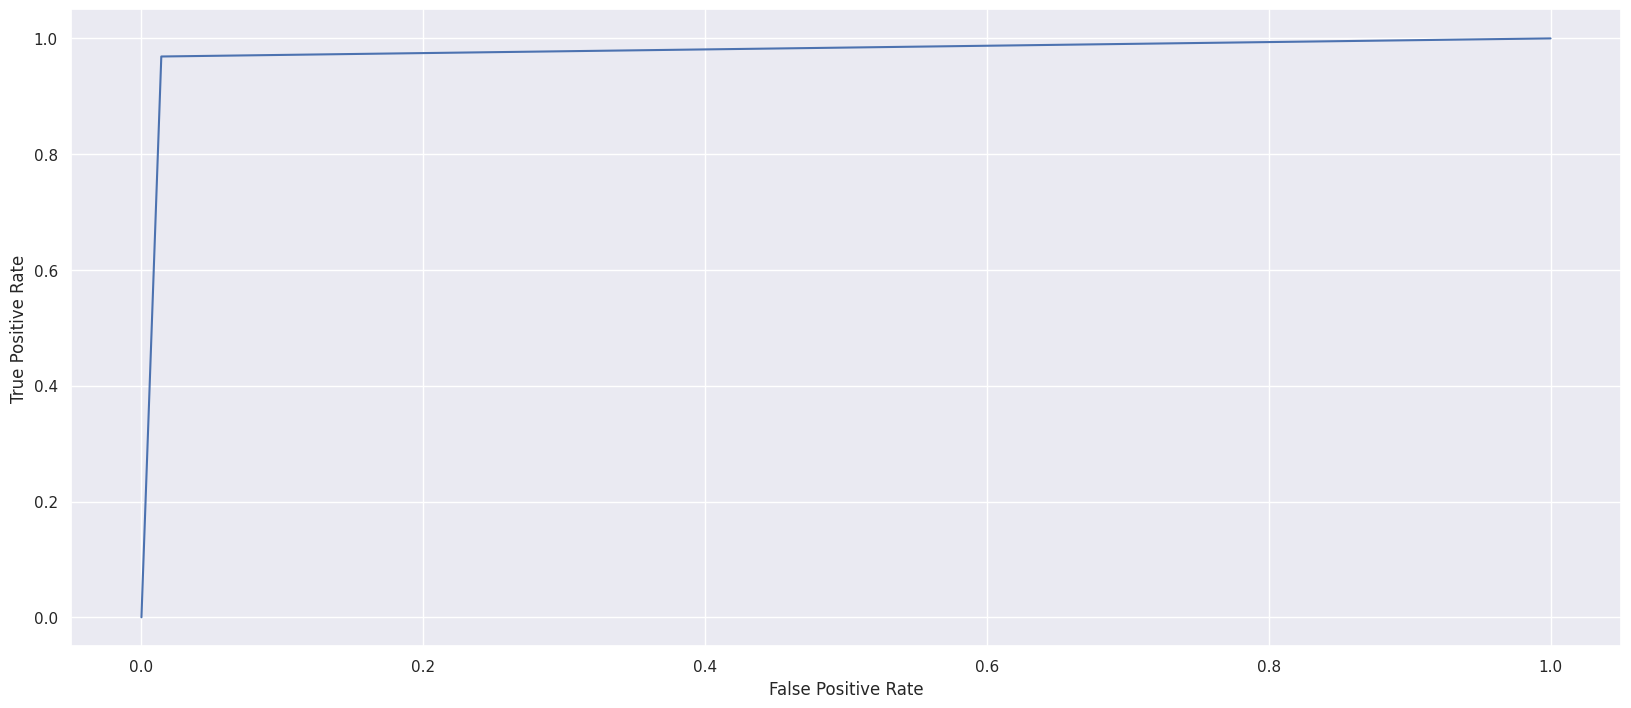

In [361]:
#ROC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred5)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

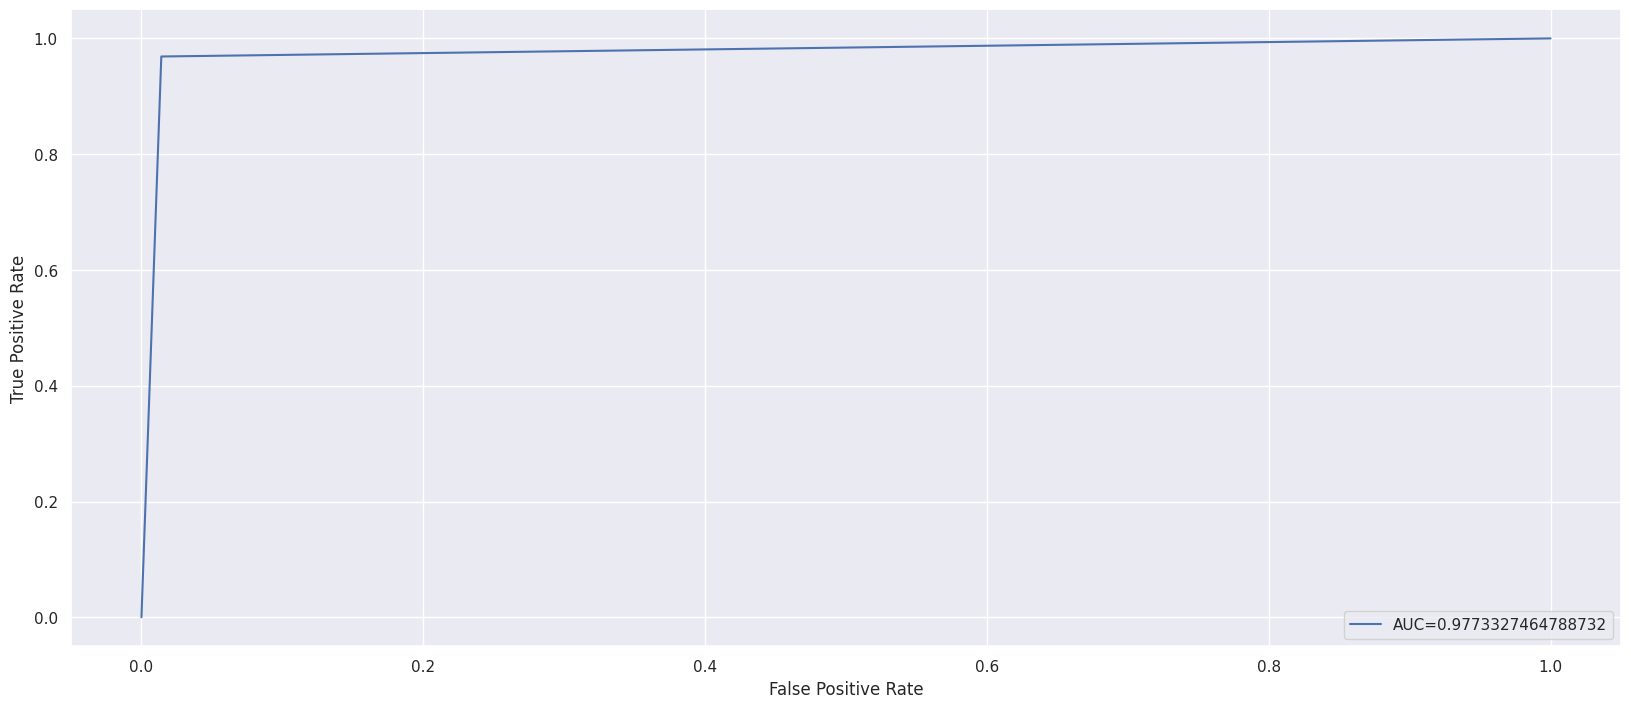

In [362]:
#AUC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred5)
auc = metrics.roc_auc_score(y_test, y_pred5)
#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [363]:
from sklearn.neighbors import KNeighborsClassifier
model6=KNeighborsClassifier()
model6.fit(x_train,y_train)

KNeighborsClassifier()

In [364]:
y_pred6=model6.predict(x_test)
y_pred6

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [365]:
model6.score(x_train,y_train)

0.9679012345679012

In [366]:
f=model6.score(x_test,y_test)
f

0.9407407407407408

In [367]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred6)
print(cm)
accuracy_score(y_test,y_pred6)

[[70  1]
 [ 7 57]]


0.9407407407407408

In [368]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred6,zero_division='warn',output_dict=True)

{'0': {'precision': 0.9090909090909091,
  'recall': 0.9859154929577465,
  'f1-score': 0.9459459459459459,
  'support': 71.0},
 '1': {'precision': 0.9827586206896551,
  'recall': 0.890625,
  'f1-score': 0.9344262295081968,
  'support': 64.0},
 'accuracy': 0.9407407407407408,
 'macro avg': {'precision': 0.9459247648902821,
  'recall': 0.9382702464788732,
  'f1-score': 0.9401860877270714,
  'support': 135.0},
 'weighted avg': {'precision': 0.9440148612562405,
  'recall': 0.9407407407407408,
  'f1-score': 0.940484747042124,
  'support': 135.0}}

In [369]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred6)
recall = recall_score(y_test,y_pred6)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9827586206896551
Recall:  0.890625


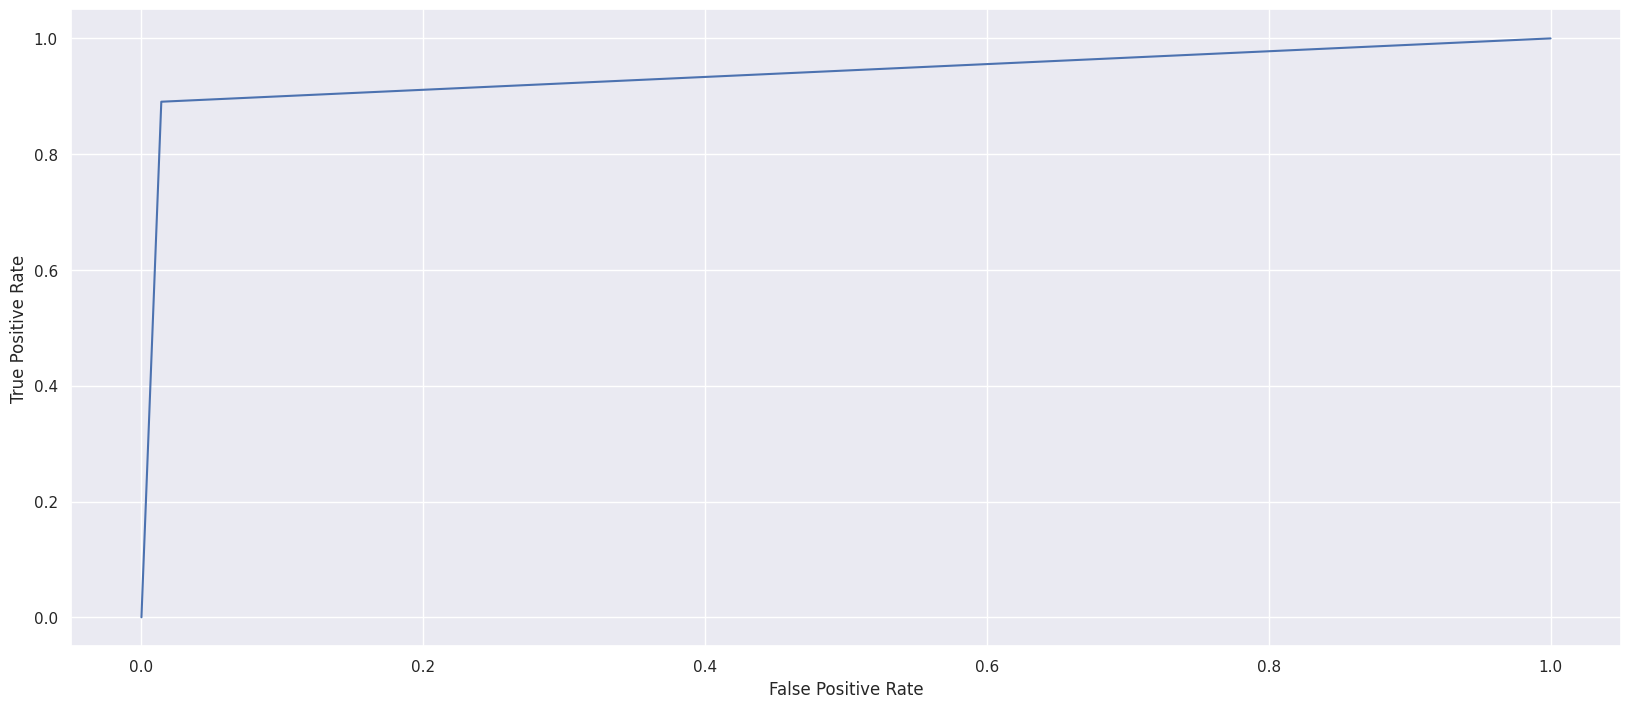

In [370]:
#ROC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred6)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

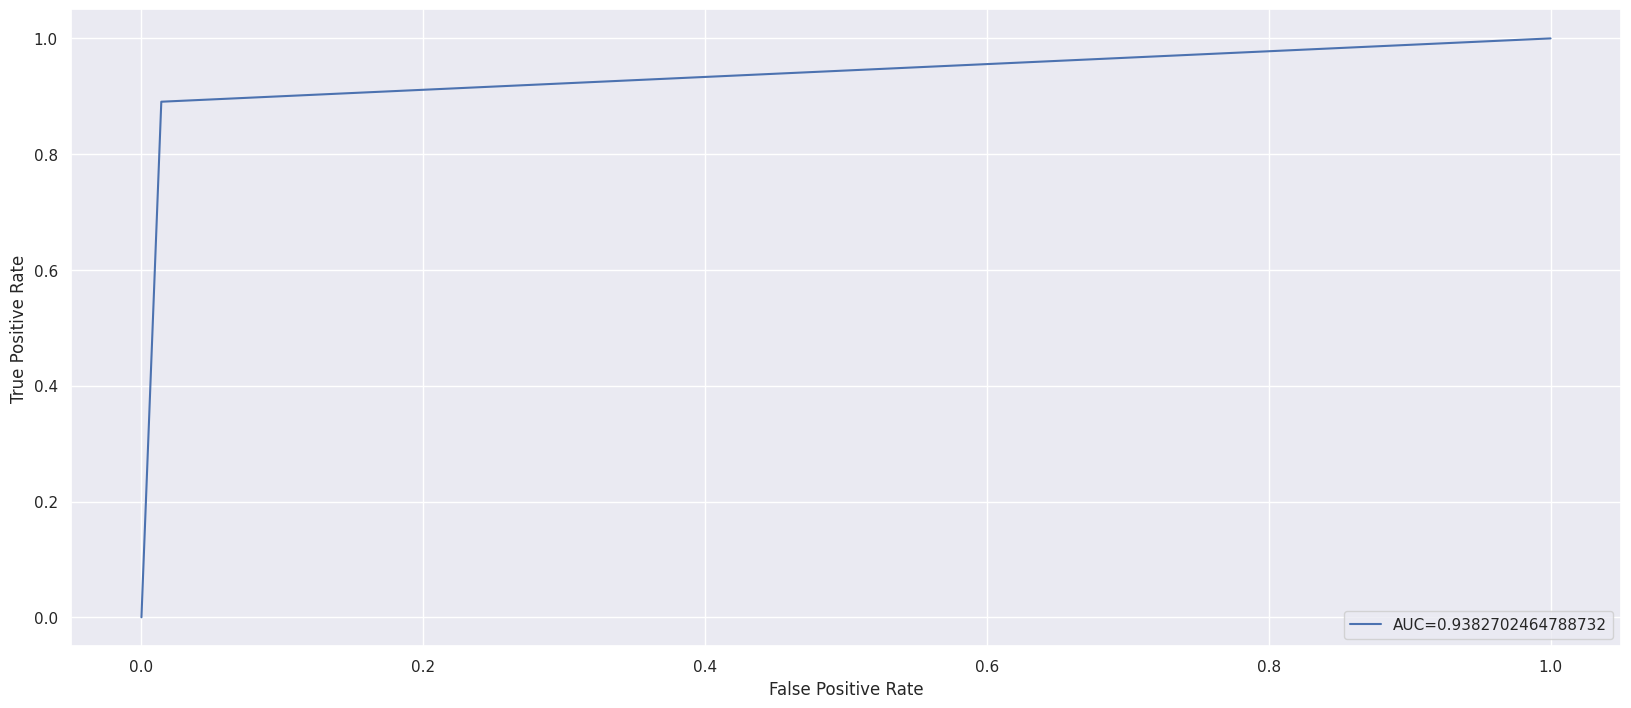

In [371]:
#AUC_CURVE
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred6)
auc = metrics.roc_auc_score(y_test, y_pred6)
#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Regression Model Scores')

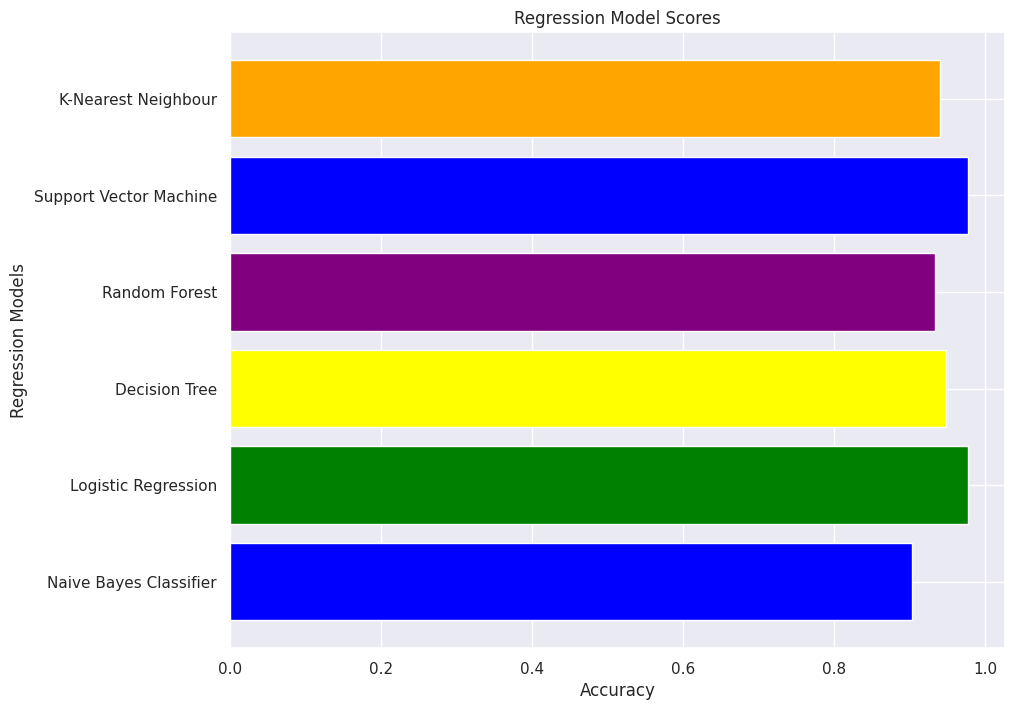

In [372]:
model=['Naive Bayes Classifier','Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','K-Nearest Neighbour']
accuracy=[a,b,c,d,e,f]
plt.figure(figsize=(10,8))
colors = ['blue','green','yellow','purple','blue','orange']
plt.barh(model,accuracy,align='center',color=colors)
plt.xlabel("Accuracy")
plt.ylabel("Regression Models")
plt.title("Regression Model Scores")

In [373]:
import plotly.graph_objs as go
fig=go.Figure([go.Bar(x=model,y=accuracy)])
fig.show()